## Data Preprocessing & EDA

### Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
bf = pd.read_csv('blackfriday.csv')

bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1003503,P00296342,M,18-25,4,B,0,0,8,NaN,NaN,7824
99997,1003503,P00227842,M,18-25,4,B,0,0,2,5.0,NaN,13235
99998,1003503,P00315842,M,18-25,4,B,0,0,5,NaN,NaN,7085
99999,1003503,P00344842,M,18-25,4,B,0,0,5,NaN,NaN,7012


In [3]:
bf_nrow = bf.shape[0]

In [4]:
def lost_record():

    bf_nrow_now = bf.shape[0]
    lost = bf_nrow - bf_nrow_now
    lost = (lost/bf_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [5]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000010e+05,100001.000000,100001.000000,100001.000000,68818.000000,30498.000000,100001.000000
mean,1.002740e+06,8.091219,0.408806,5.301737,9.857203,12.658404,9298.305277
std,1.684191e+03,6.529096,0.491616,3.734653,5.083870,4.123401,4966.841467
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001300e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5862.000000
50%,1.002611e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004055e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12043.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


#### Performing Typecasting

In [6]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100001 non-null  int64  
 1   Product_ID                  100001 non-null  object 
 2   Gender                      100001 non-null  object 
 3   Age                         100001 non-null  object 
 4   Occupation                  100001 non-null  int64  
 5   City_Category               100001 non-null  object 
 6   Stay_In_Current_City_Years  100001 non-null  object 
 7   Marital_Status              100001 non-null  int64  
 8   Product_Category_1          100001 non-null  int64  
 9   Product_Category_2          68818 non-null   float64
 10  Product_Category_3          30498 non-null   float64
 11  Purchase                    100001 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


#### Performing Missing Value Imputation

In [7]:
def missing_percentage(bf):

    m = bf.isna().sum()
    total = int(bf.shape[0])

    for i in range(len(bf.columns)):
        percentage =round((m[i]/total)*100)

        print(str(bf.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [8]:
missing_percentage(bf)

User_ID has 0 % missing value(0)
Product_ID has 0 % missing value(0)
Gender has 0 % missing value(0)
Age has 0 % missing value(0)
Occupation has 0 % missing value(0)
City_Category has 0 % missing value(0)
Stay_In_Current_City_Years has 0 % missing value(0)
Marital_Status has 0 % missing value(0)
Product_Category_1 has 0 % missing value(0)
Product_Category_2 has 31 % missing value(31183)
Product_Category_3 has 70 % missing value(69503)
Purchase has 0 % missing value(0)


#### Performing mode imputation

In [9]:
bf['Product_Category_2']=bf['Product_Category_2'].fillna(bf['Product_Category_2'].mode()[0])
bf['Product_Category_3']=bf['Product_Category_3'].fillna(bf['Product_Category_3'].mode()[0])

In [10]:
missing_percentage(bf)

User_ID has 0 % missing value(0)
Product_ID has 0 % missing value(0)
Gender has 0 % missing value(0)
Age has 0 % missing value(0)
Occupation has 0 % missing value(0)
City_Category has 0 % missing value(0)
Stay_In_Current_City_Years has 0 % missing value(0)
Marital_Status has 0 % missing value(0)
Product_Category_1 has 0 % missing value(0)
Product_Category_2 has 0 % missing value(0)
Product_Category_3 has 0 % missing value(0)
Purchase has 0 % missing value(0)


In [11]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


#### Finding Unique Values In Dataset

In [12]:
def uni(bf):

    for i in range(len(bf.columns)):
        print('\n All Unique Value in ' + str(bf.columns[i]))
        print(np.sort(bf[bf.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(bf[bf.columns[i]].unique())))

In [13]:
uni(bf)


 All Unique Value in User_ID
[1000001 1000002 1000003 ... 1006037 1006039 1006040]
Total no of unique values 5798

 All Unique Value in Product_ID
['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Total no of unique values 3319

 All Unique Value in Gender
['F' 'M']
Total no of unique values 2

 All Unique Value in Age
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Total no of unique values 7

 All Unique Value in Occupation
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Total no of unique values 21

 All Unique Value in City_Category
['A' 'B' 'C']
Total no of unique values 3

 All Unique Value in Stay_In_Current_City_Years
['0' '1' '2' '3' '4+']
Total no of unique values 5

 All Unique Value in Marital_Status
[0 1]
Total no of unique values 2

 All Unique Value in Product_Category_1
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Total no of unique values 18

 All Unique Value in Product_Category_2
[ 2.  3.  4.  5.  6.  7.  8

#### Checking for Duplicated Values

In [14]:
bf[bf.duplicated()].shape[0]

0

- There is no duplicate value in are dataset

#### Preprocessing the Dataset


In [15]:
bf['Gender']=bf['Gender'].map({'F':0,'M':1})
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [16]:
bf['Age']=bf['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969


In [17]:
cols = [ 'City_Category', 'Stay_In_Current_City_Years']
le = LabelEncoder()
for col in cols:
    bf[col] = le.fit_transform(bf[col])
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1003503,P00296342,1,2,4,1,0,0,8,8.0,16.0,7824
99997,1003503,P00227842,1,2,4,1,0,0,2,5.0,16.0,13235
99998,1003503,P00315842,1,2,4,1,0,0,5,8.0,16.0,7085
99999,1003503,P00344842,1,2,4,1,0,0,5,8.0,16.0,7012


In [18]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     100001 non-null  int64  
 1   Product_ID                  100001 non-null  object 
 2   Gender                      100001 non-null  int64  
 3   Age                         100001 non-null  int64  
 4   Occupation                  100001 non-null  int64  
 5   City_Category               100001 non-null  int32  
 6   Stay_In_Current_City_Years  100001 non-null  int32  
 7   Marital_Status              100001 non-null  int64  
 8   Product_Category_1          100001 non-null  int64  
 9   Product_Category_2          100001 non-null  float64
 10  Product_Category_3          100001 non-null  float64
 11  Purchase                    100001 non-null  int64  
dtypes: float64(2), int32(2), int64(7), object(1)
memory usage: 8.4+ MB


### Visualizing The Data 

### Distplot for Purchase

<Axes: xlabel='Purchase', ylabel='Density'>

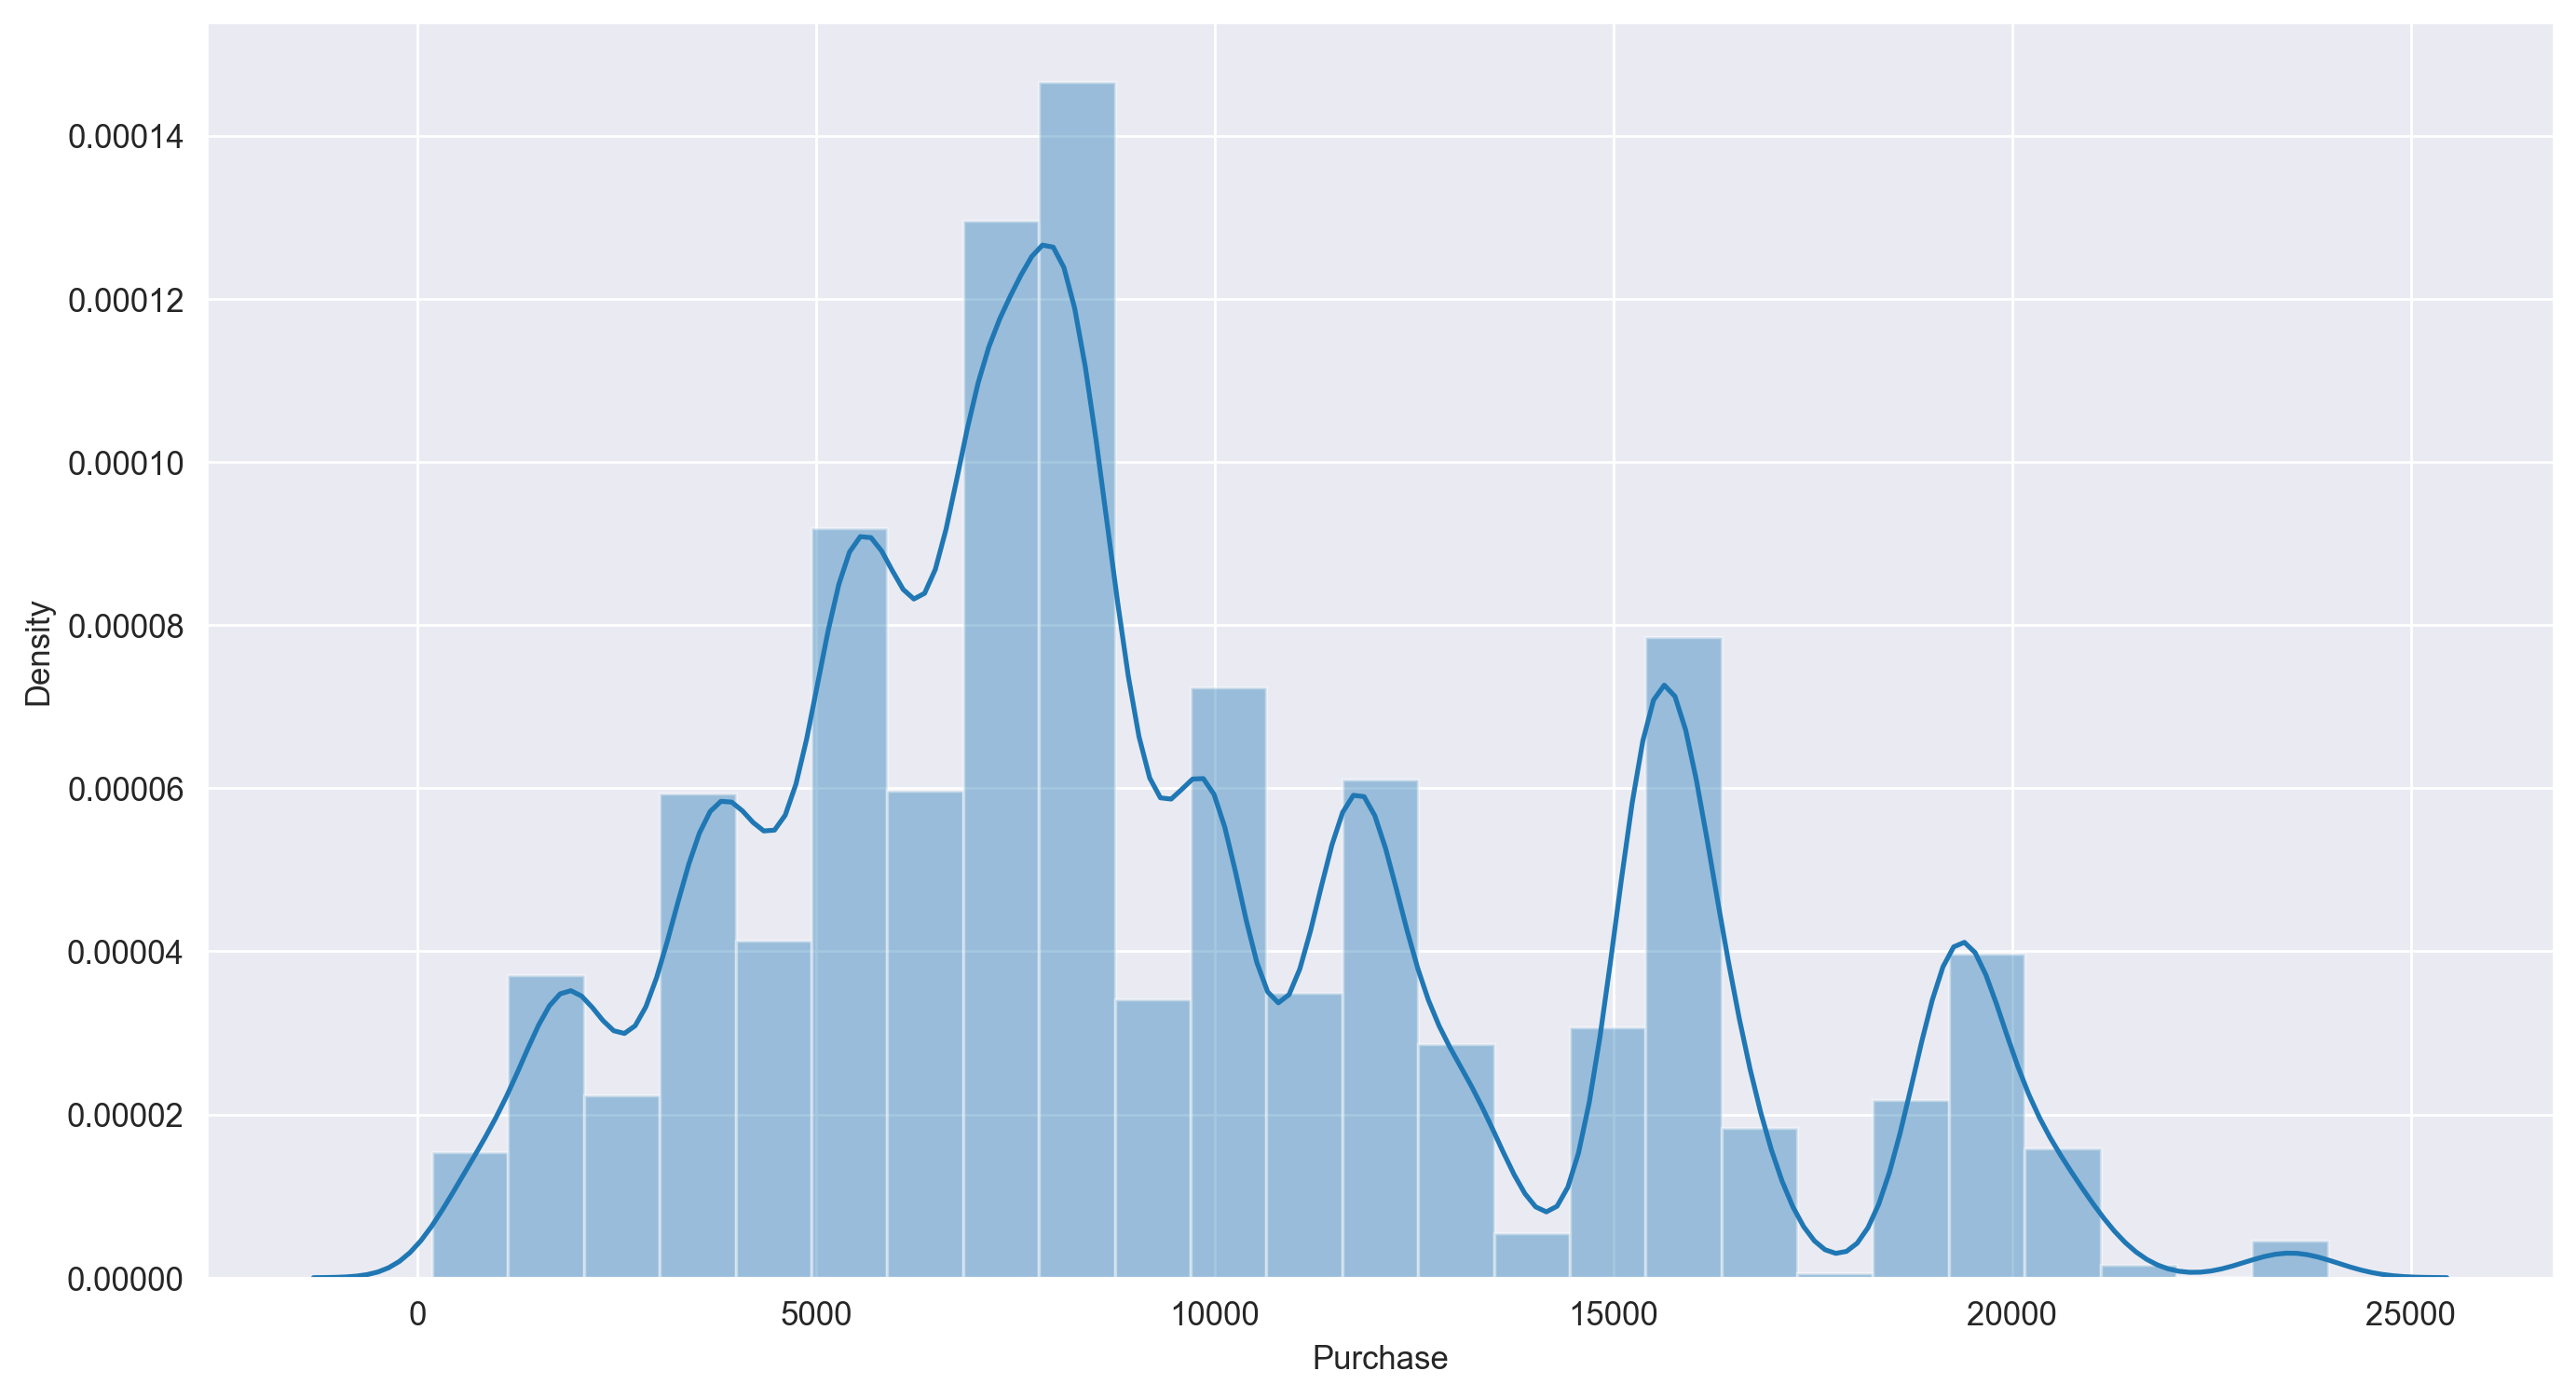

In [19]:
plt.figure(figsize=(13, 7))
sns.distplot(bf['Purchase'], bins=25)

### Distribution of Numeric Variables

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `~matplotlib.figure.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  pro

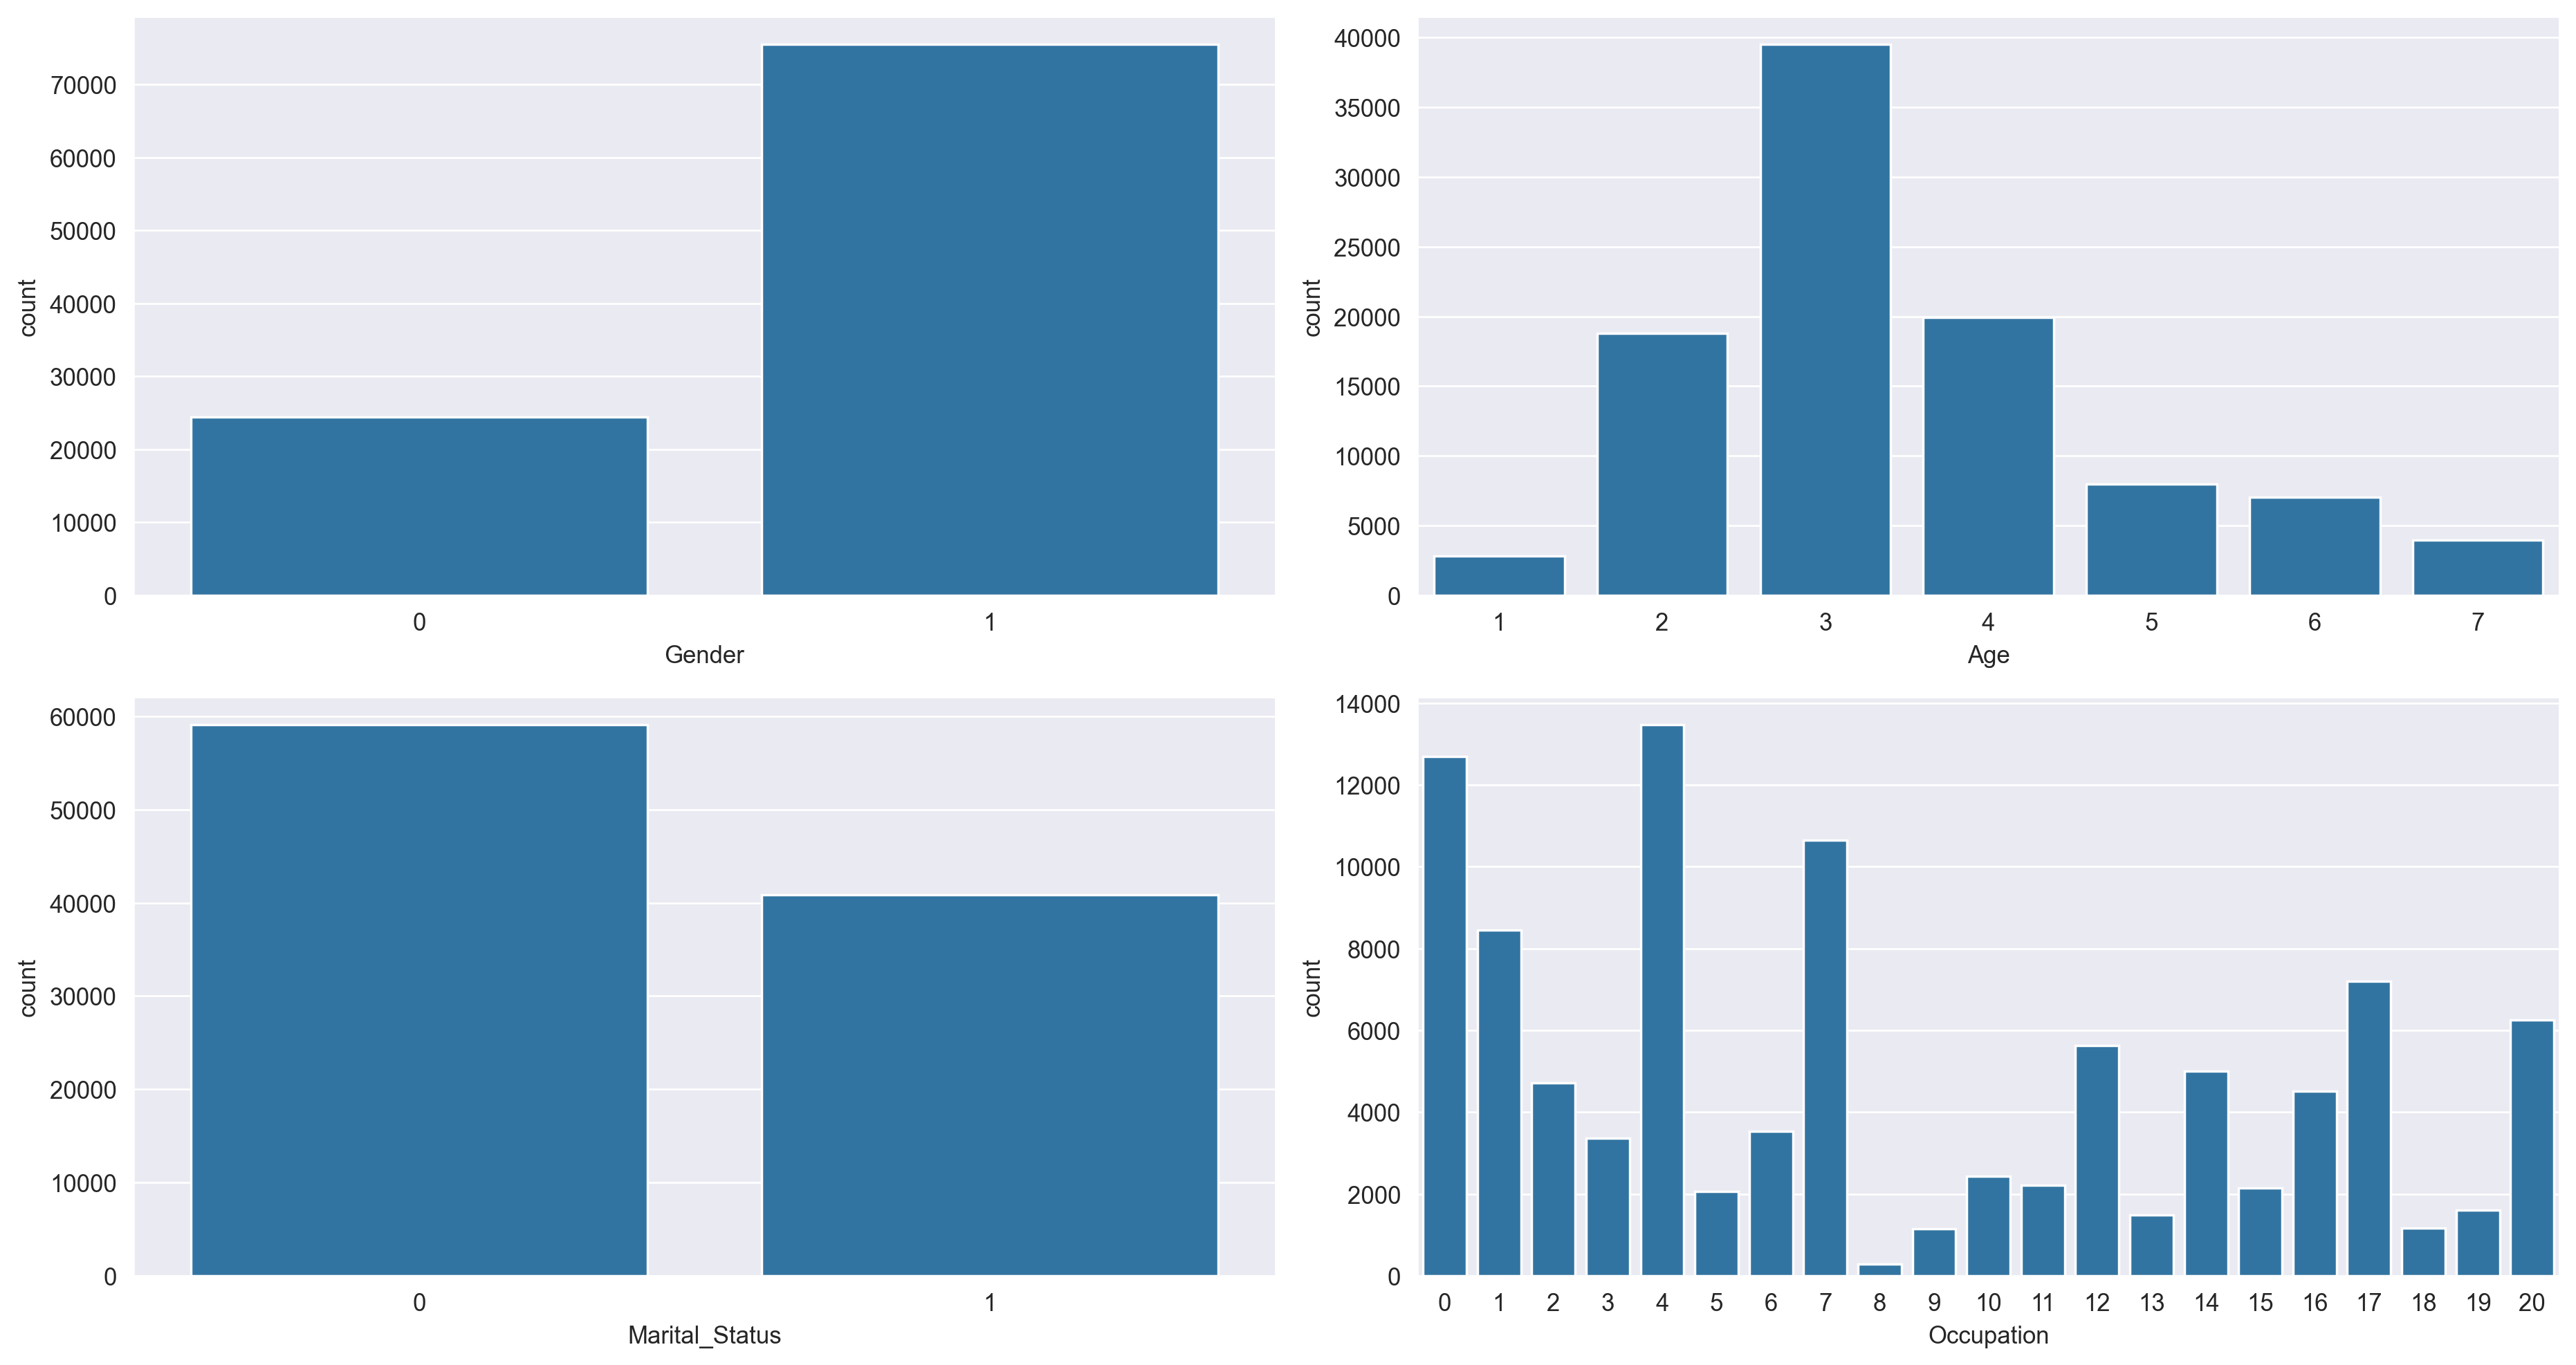

In [20]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0])
sns.countplot(data=bf, x='Gender', ax = ax[0,0])

plt.setp(ax[0,1])
sns.countplot(data=bf, x='Age', ax = ax[0,1])

plt.setp(ax[1,0])
sns.countplot(data=bf, x='Marital_Status', ax = ax[1,0])

plt.setp(ax[1,0])
sns.countplot(data=bf, x='Occupation', ax = ax[1,1])

plt.tight_layout()

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `~matplotlib.figure.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  pro

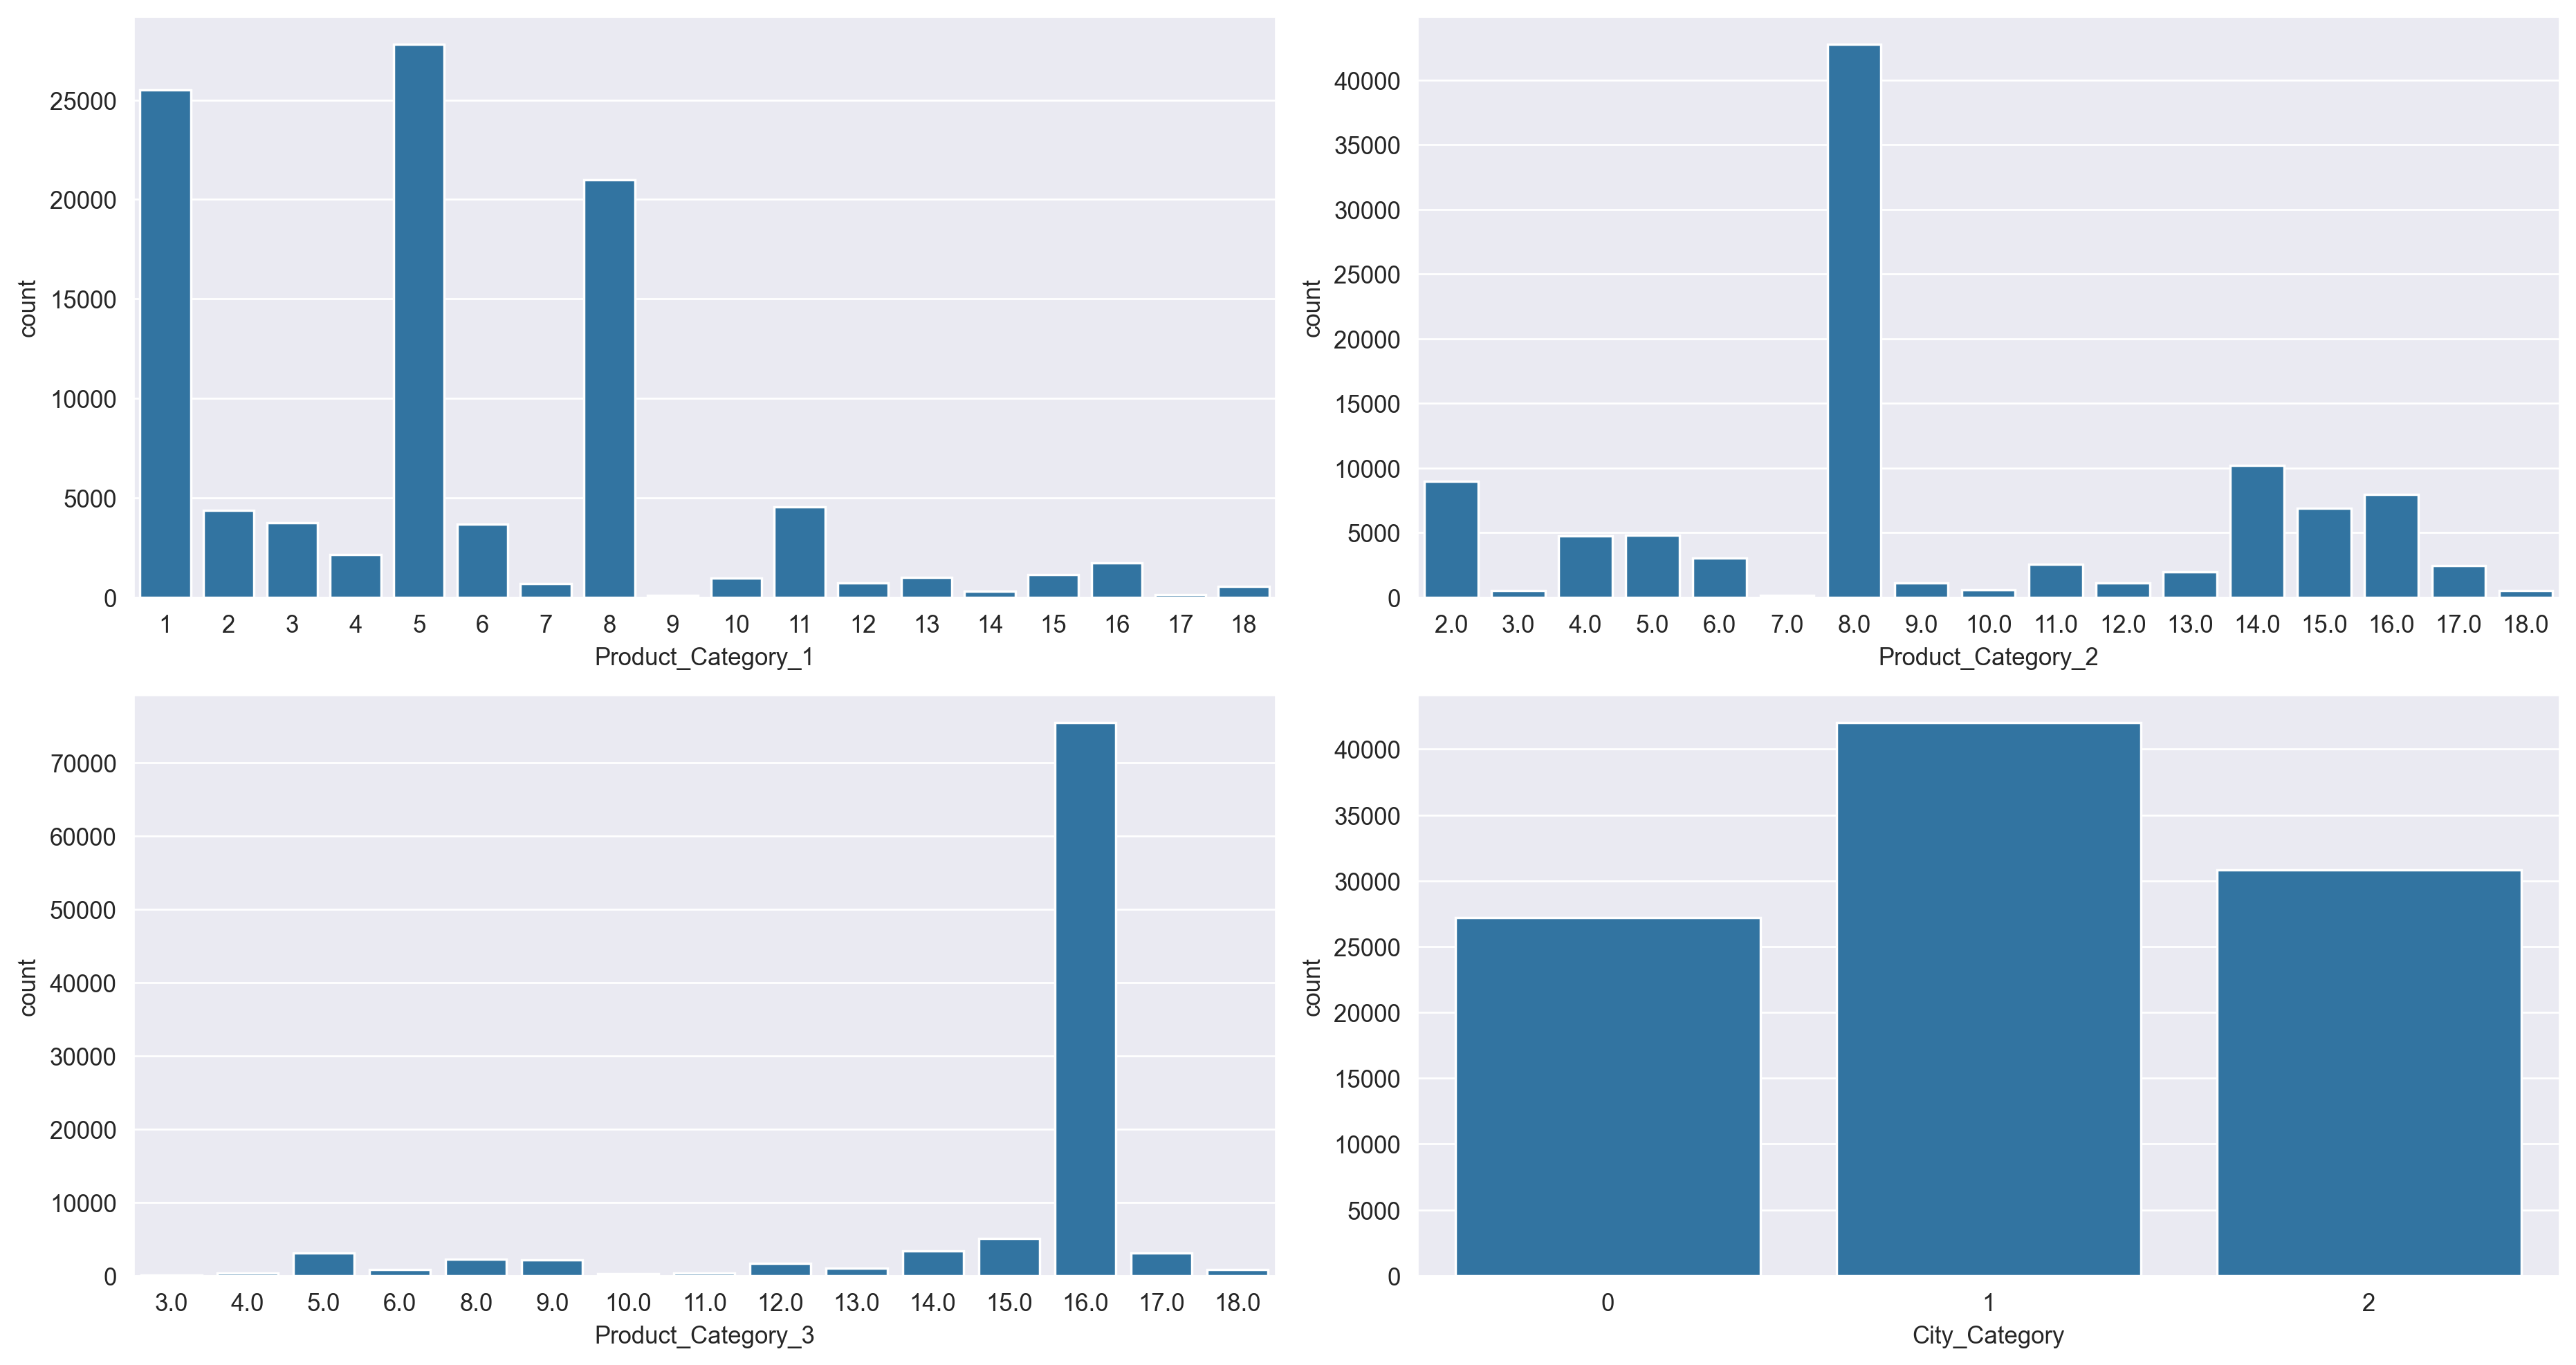

In [21]:
fig, ax = plt.subplots(2,2)

plt.setp(ax[0,0])
sns.countplot(data=bf, x='Product_Category_1', ax = ax[0,0])

plt.setp(ax[0,1])
sns.countplot(data=bf, x='Product_Category_2', ax = ax[0,1])

plt.setp(ax[1,0])
sns.countplot(data=bf, x='Product_Category_3', ax = ax[1,0])

plt.setp(ax[1,0])
sns.countplot(data=bf, x='City_Category', ax = ax[1,1])

plt.tight_layout()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

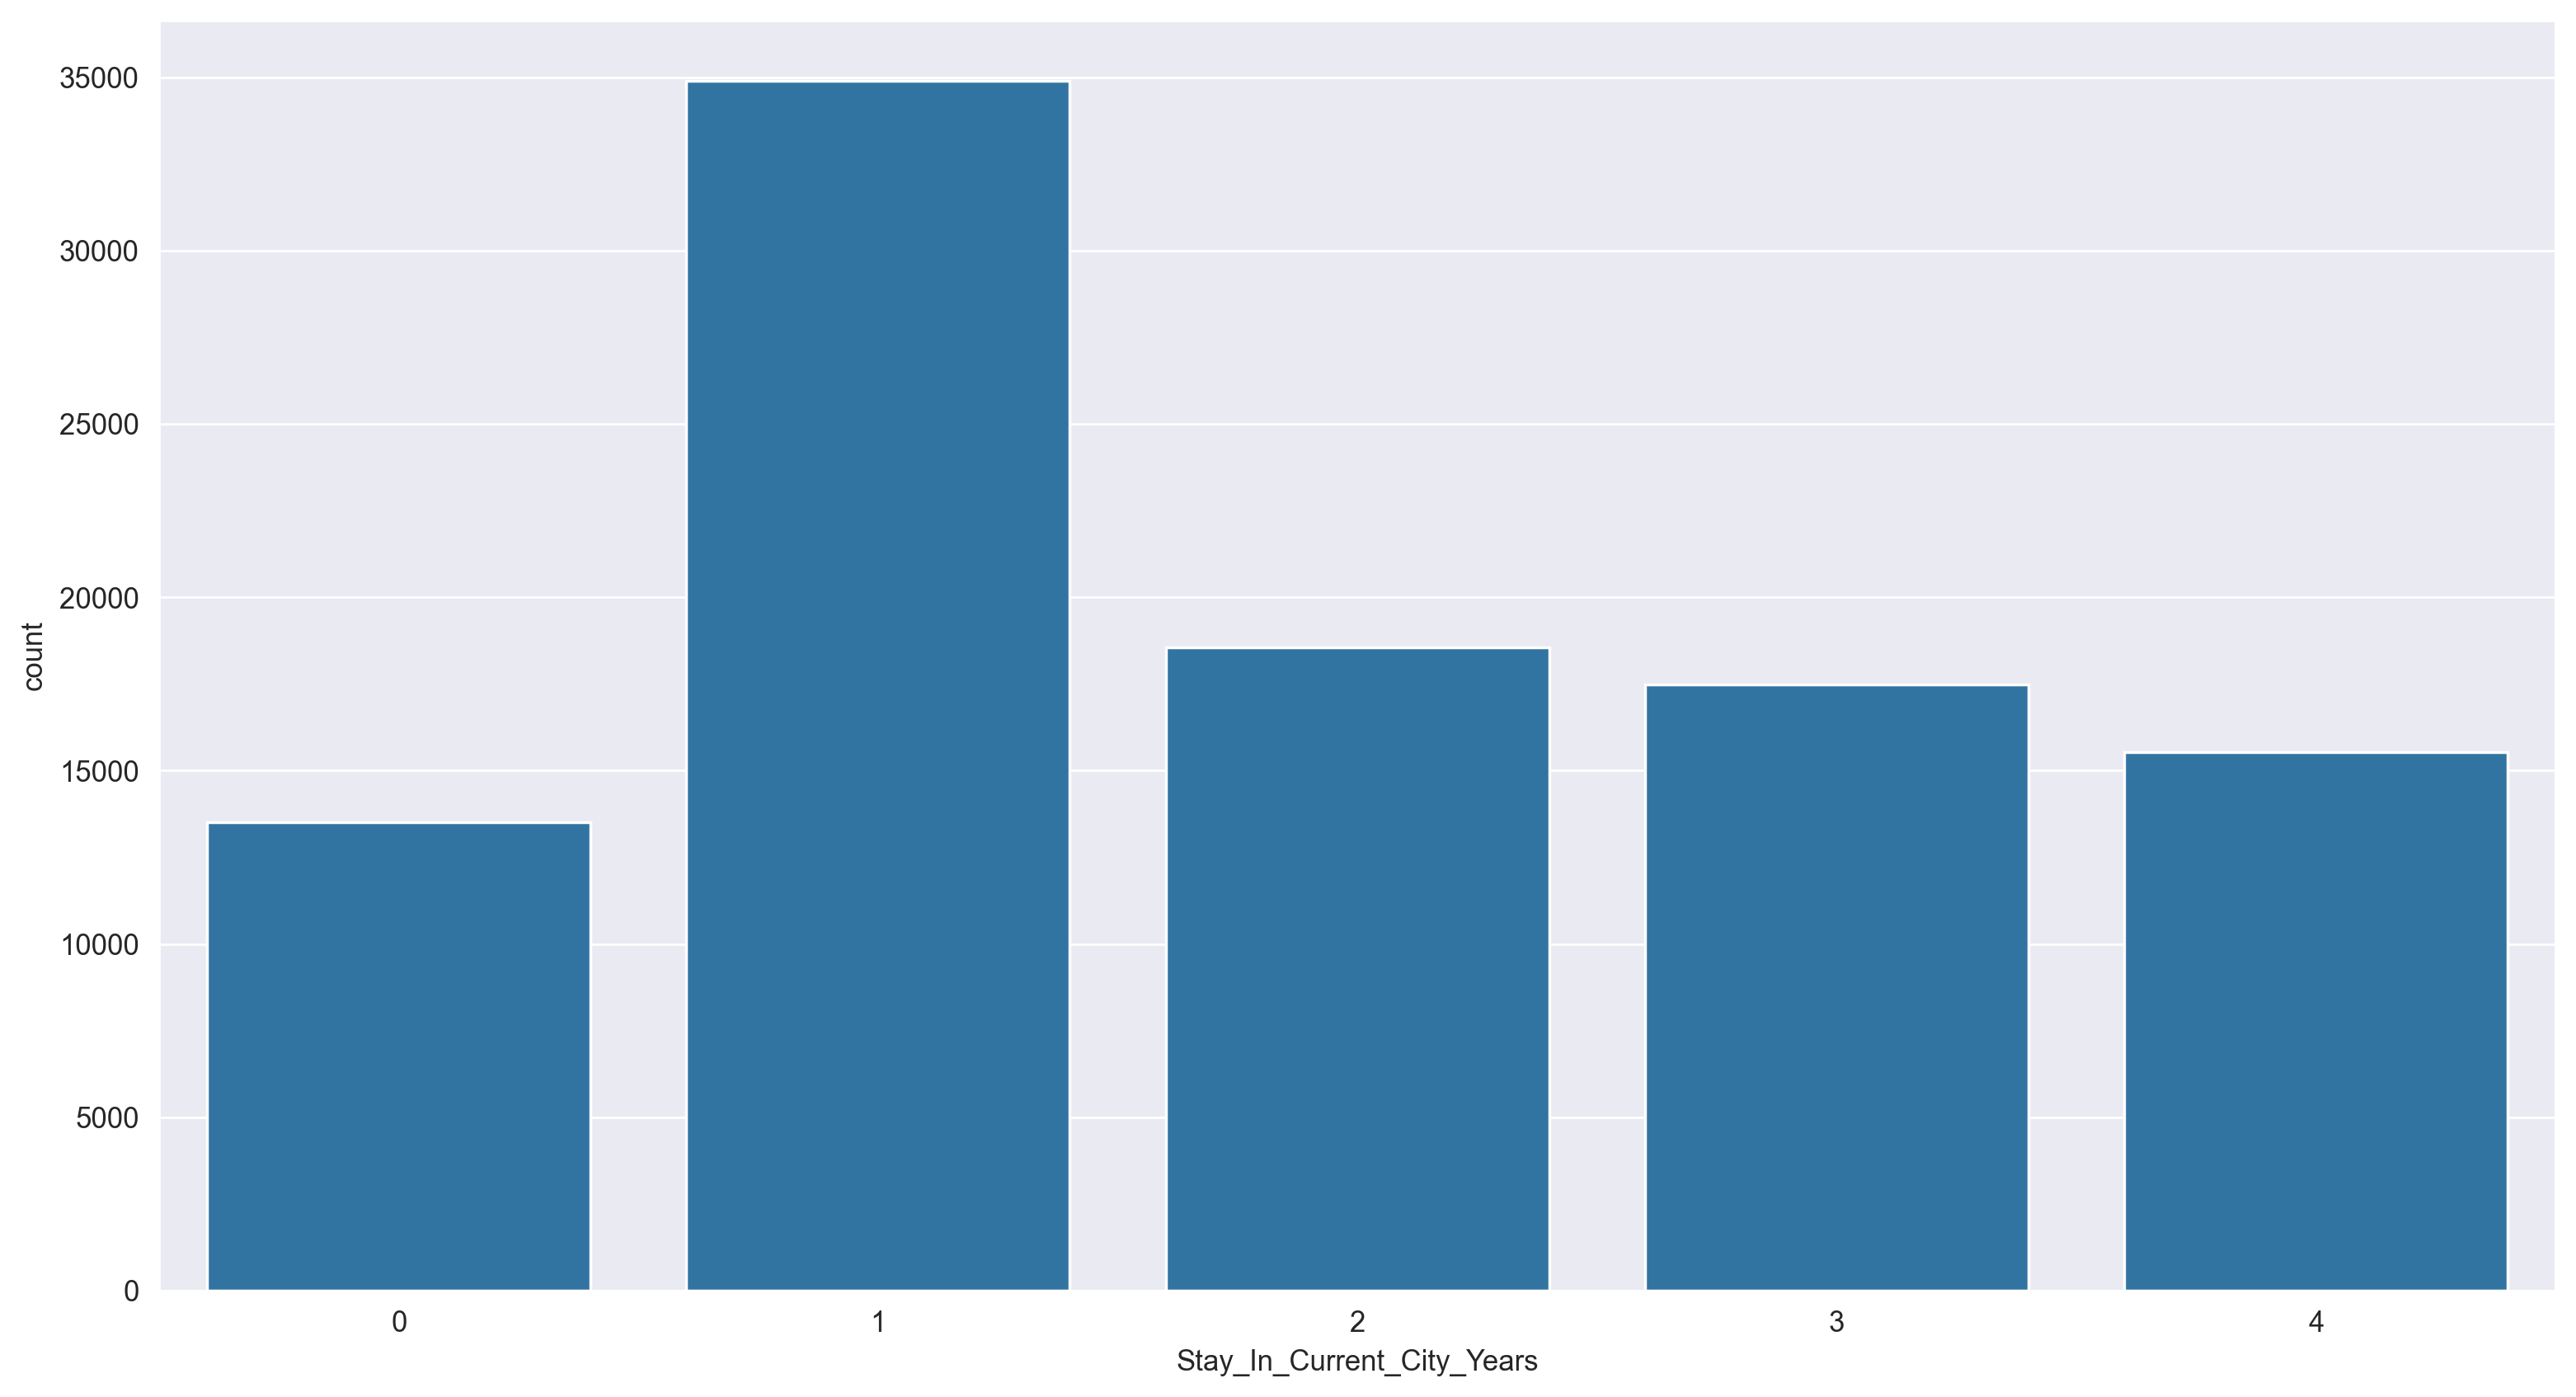

In [22]:
sns.countplot(data=bf, x='Stay_In_Current_City_Years')

#### Occupation and Purchase Analysis

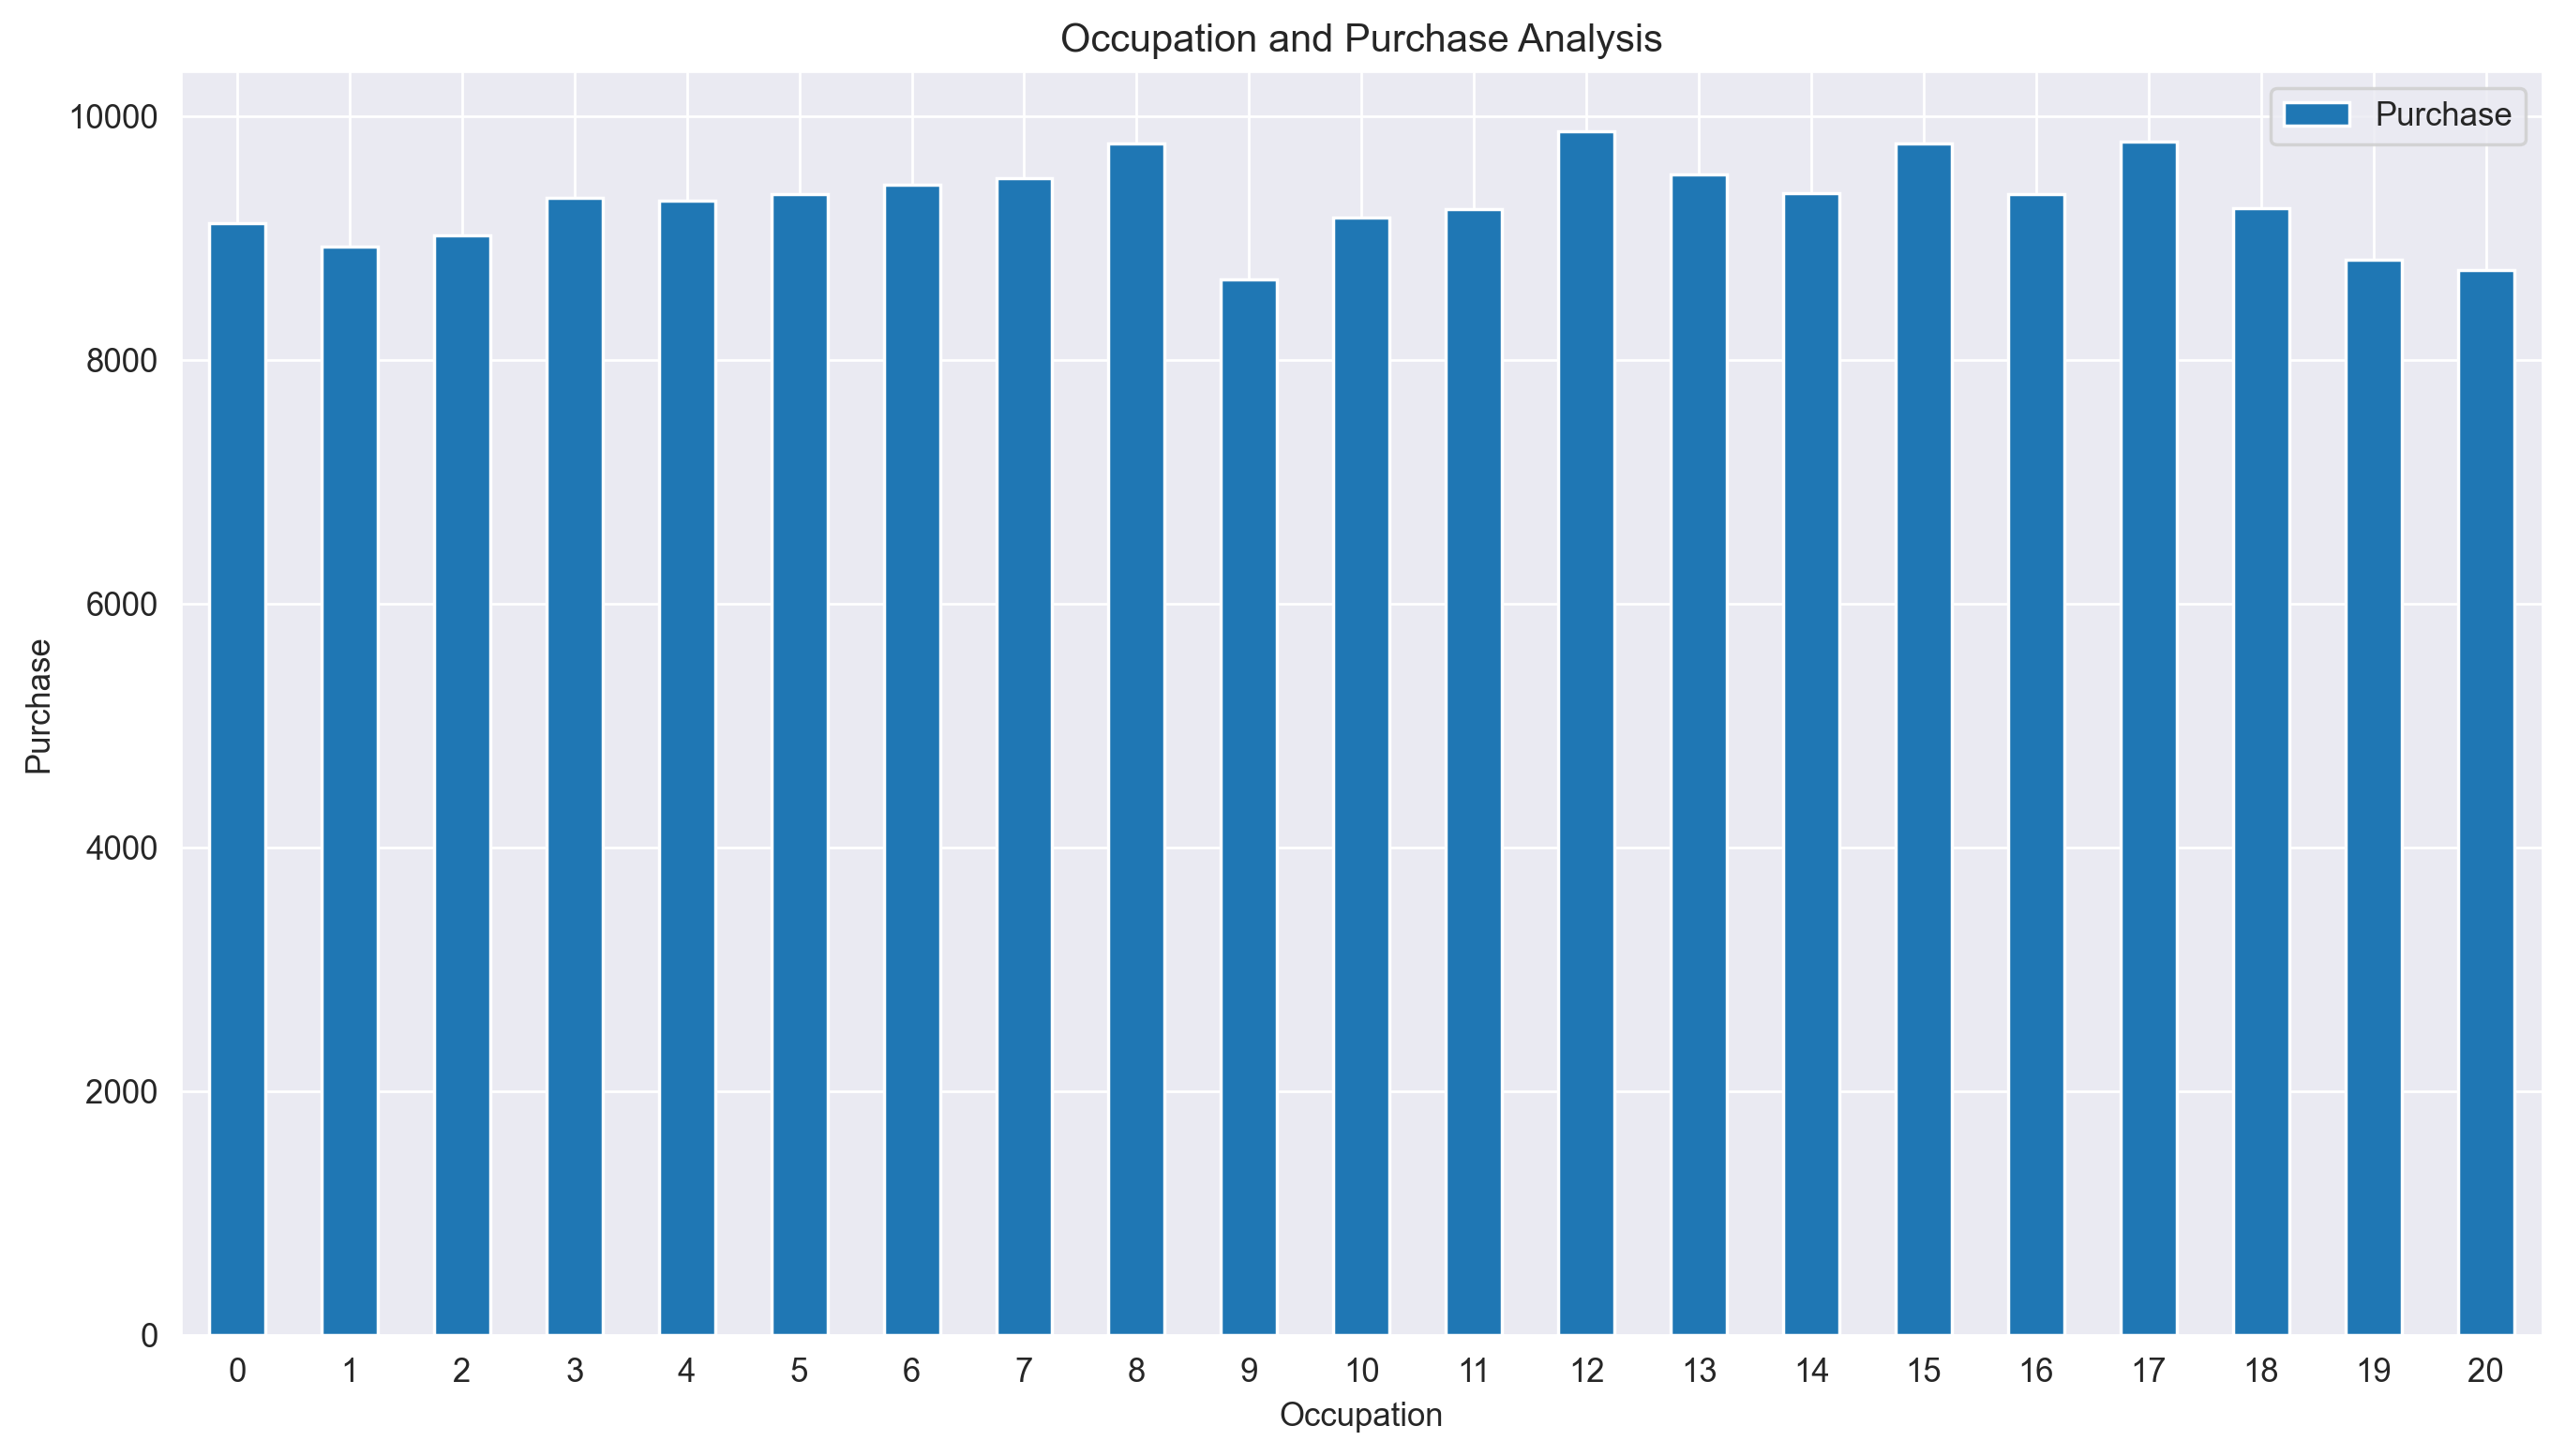

In [23]:
occupation_plot = bf.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Age and Purchase Analysis

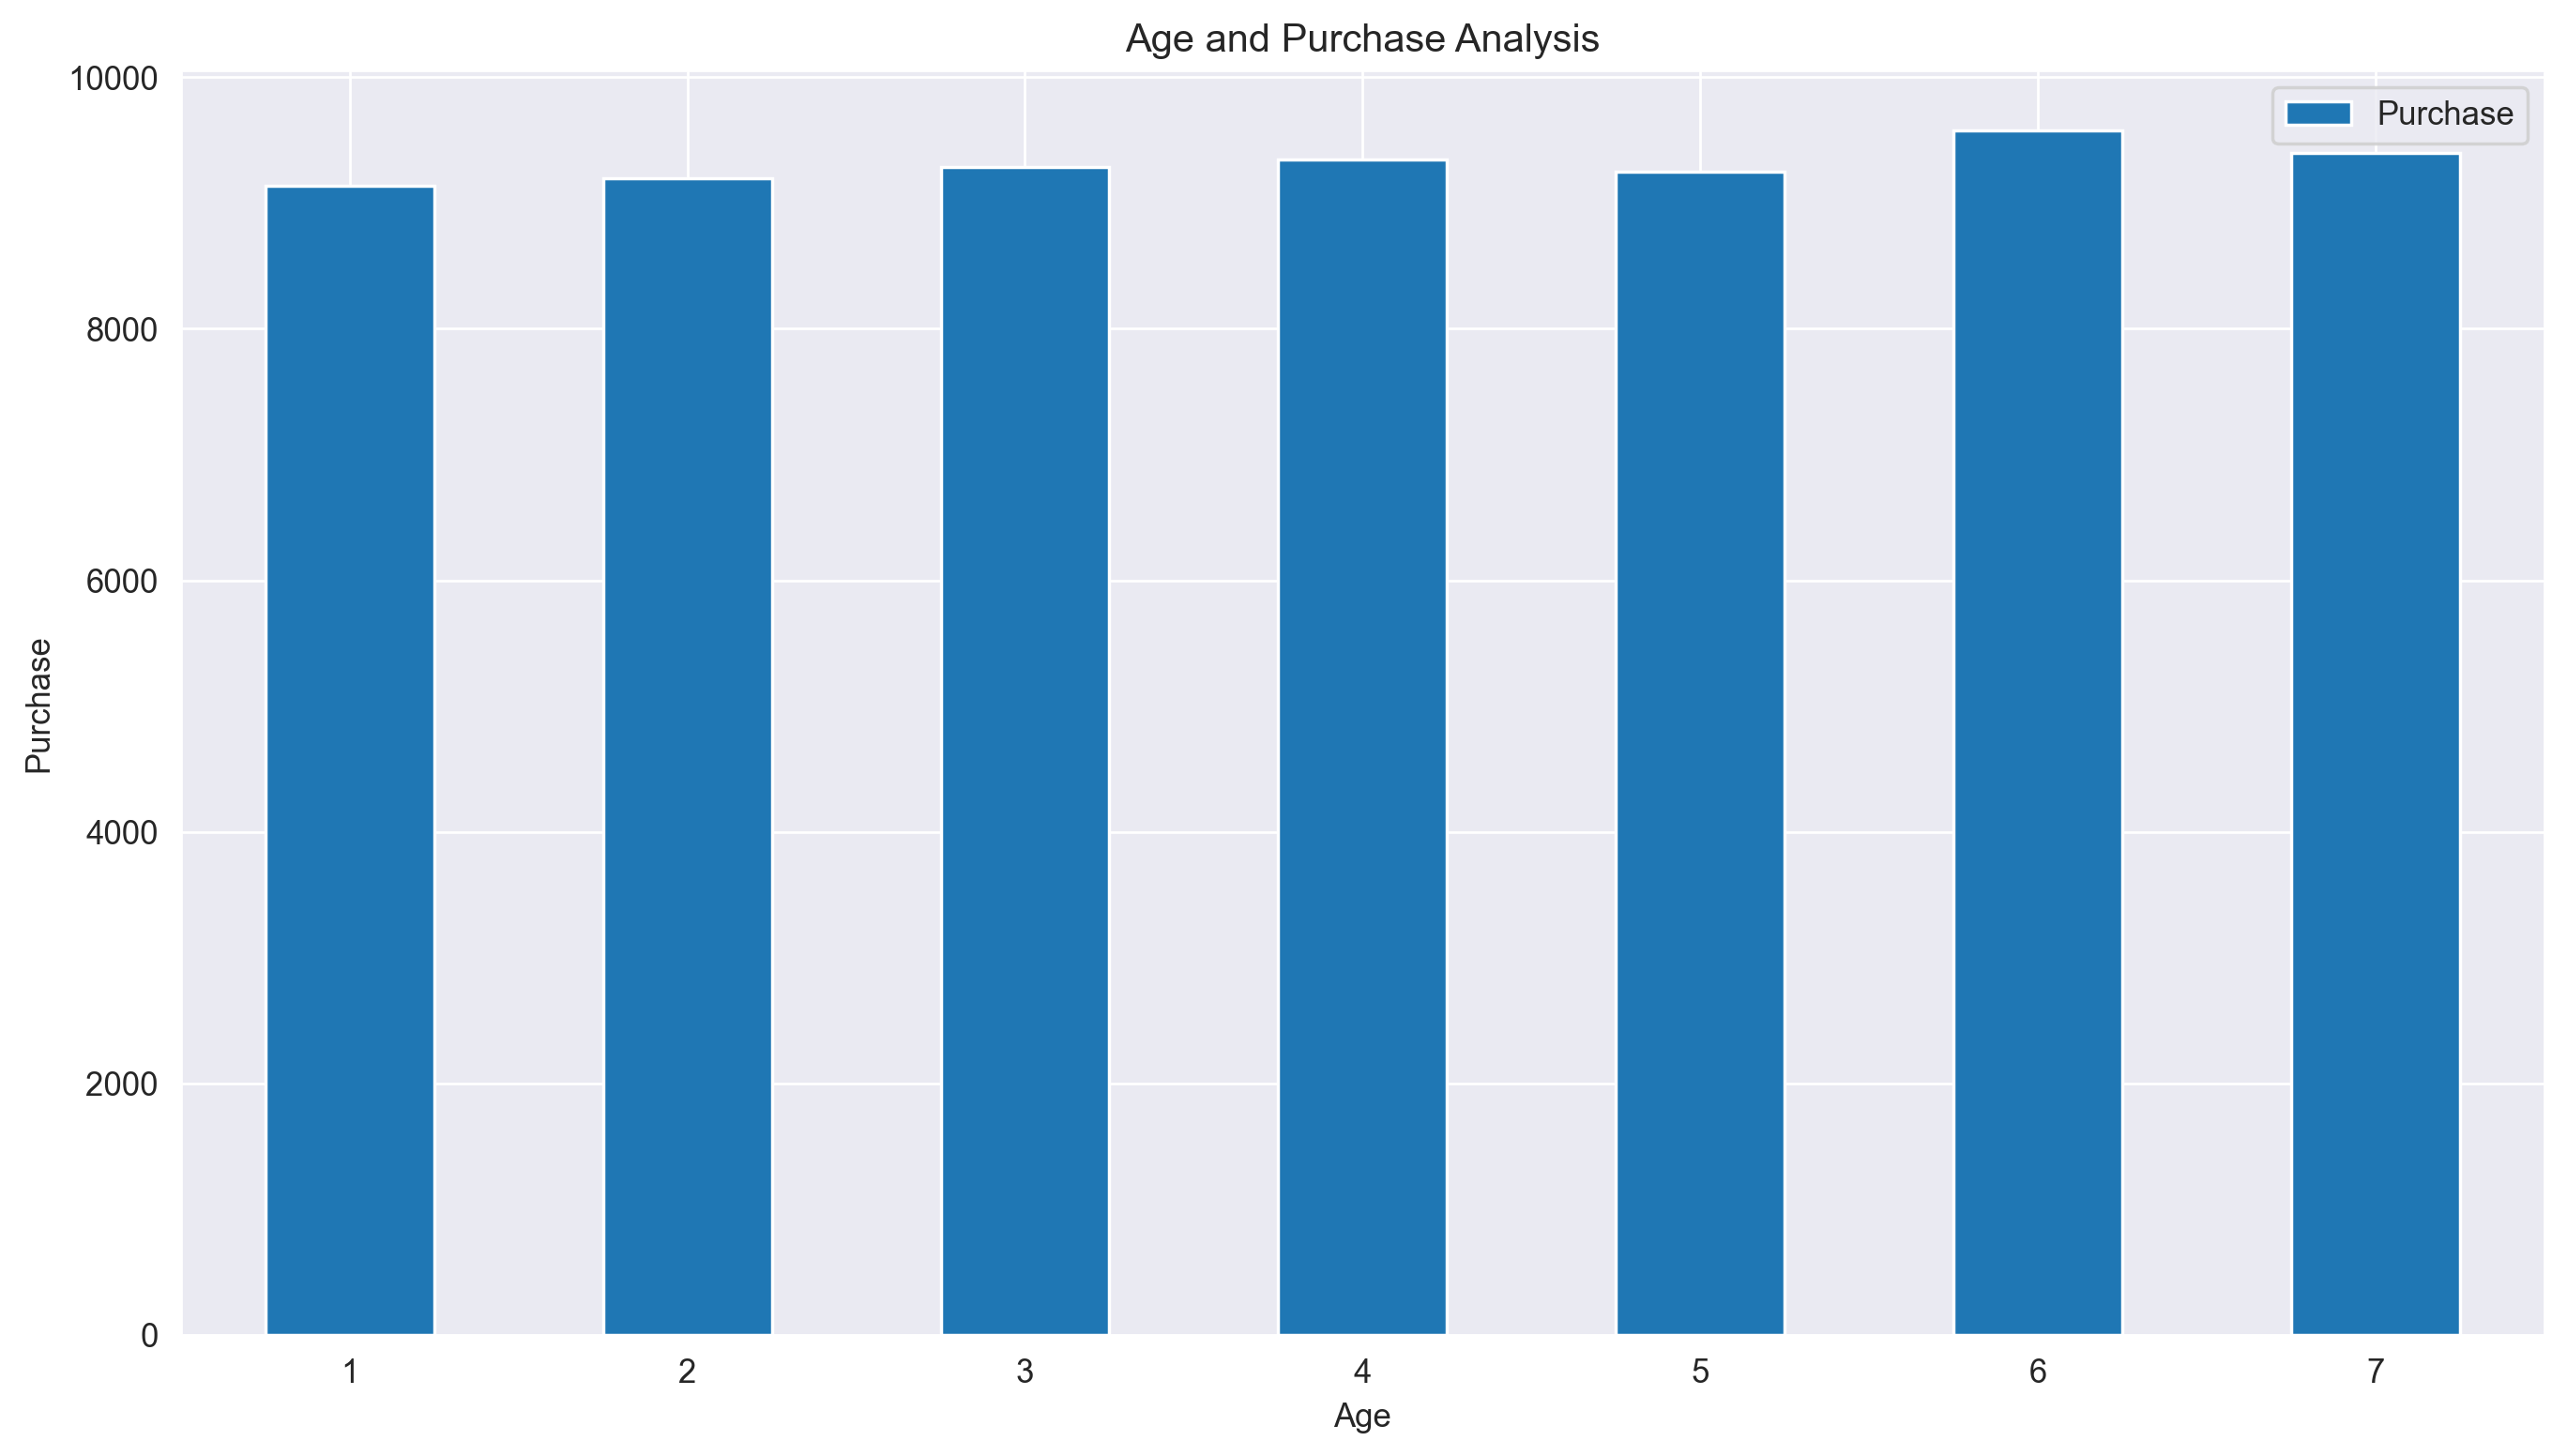

In [24]:
age_plot = bf.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Gender and Purchase Analysis

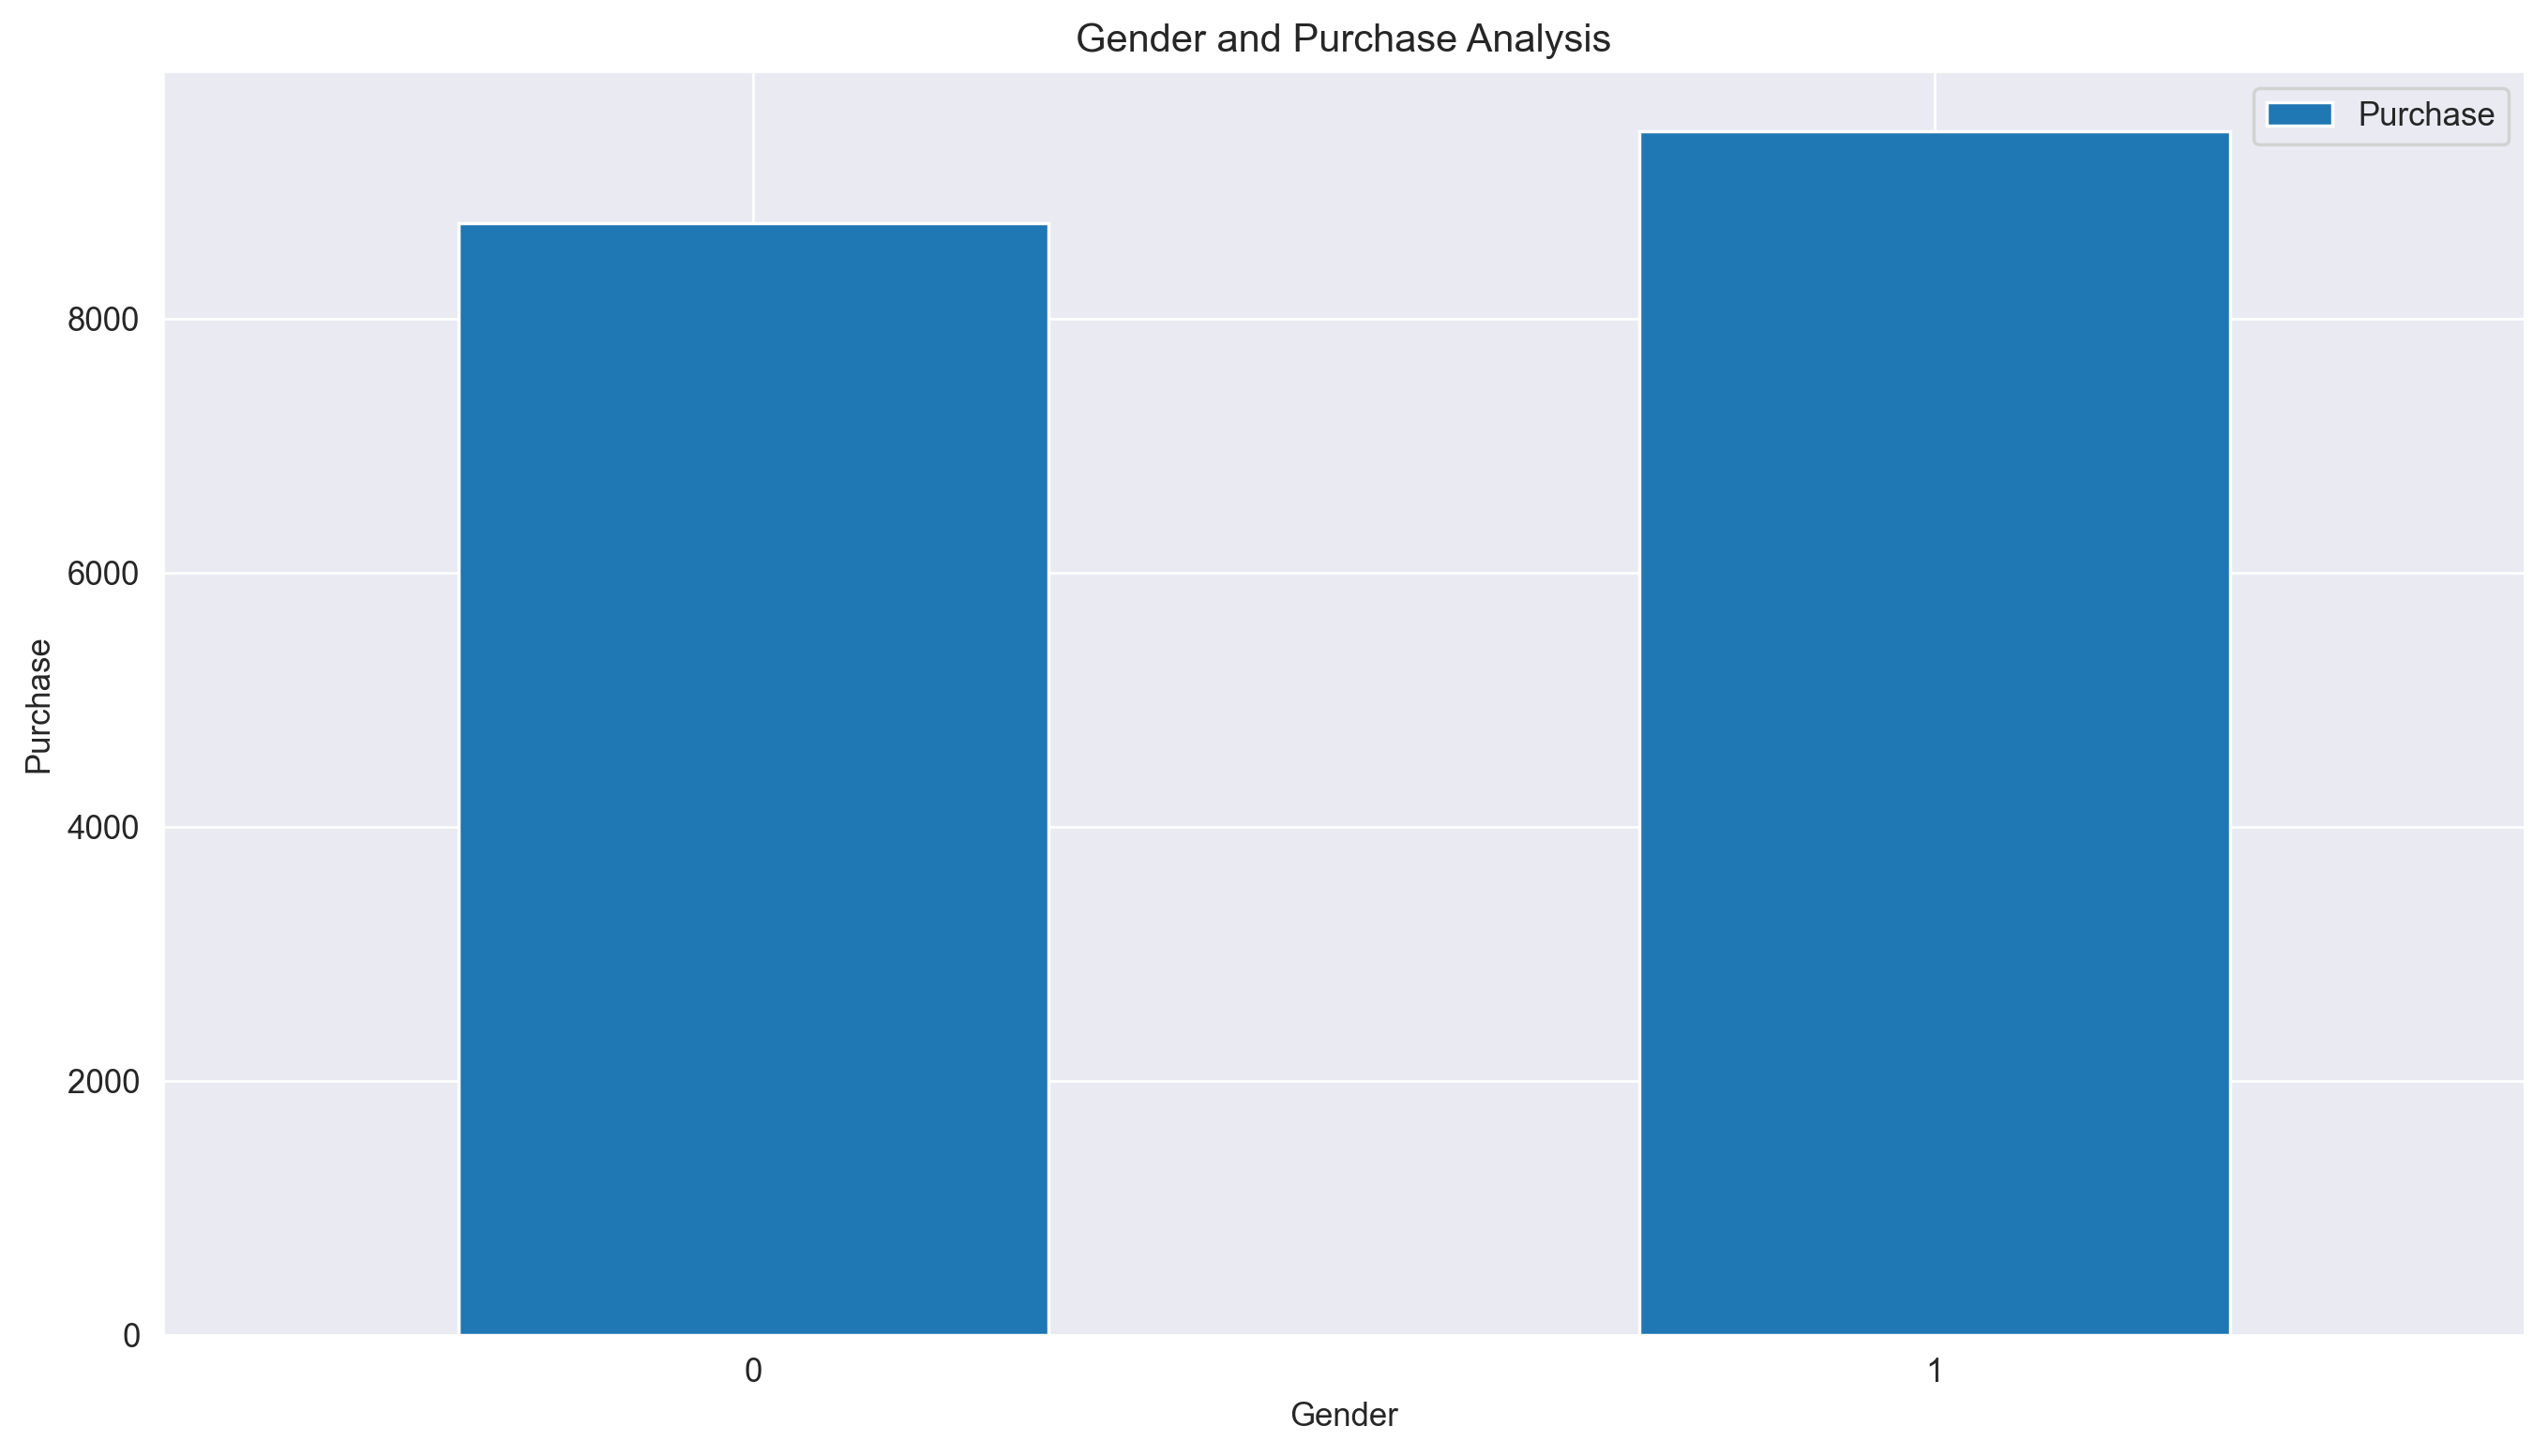

In [25]:
gender_plot = bf.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Age vs Purchased

<Axes: xlabel='Age', ylabel='Purchase'>

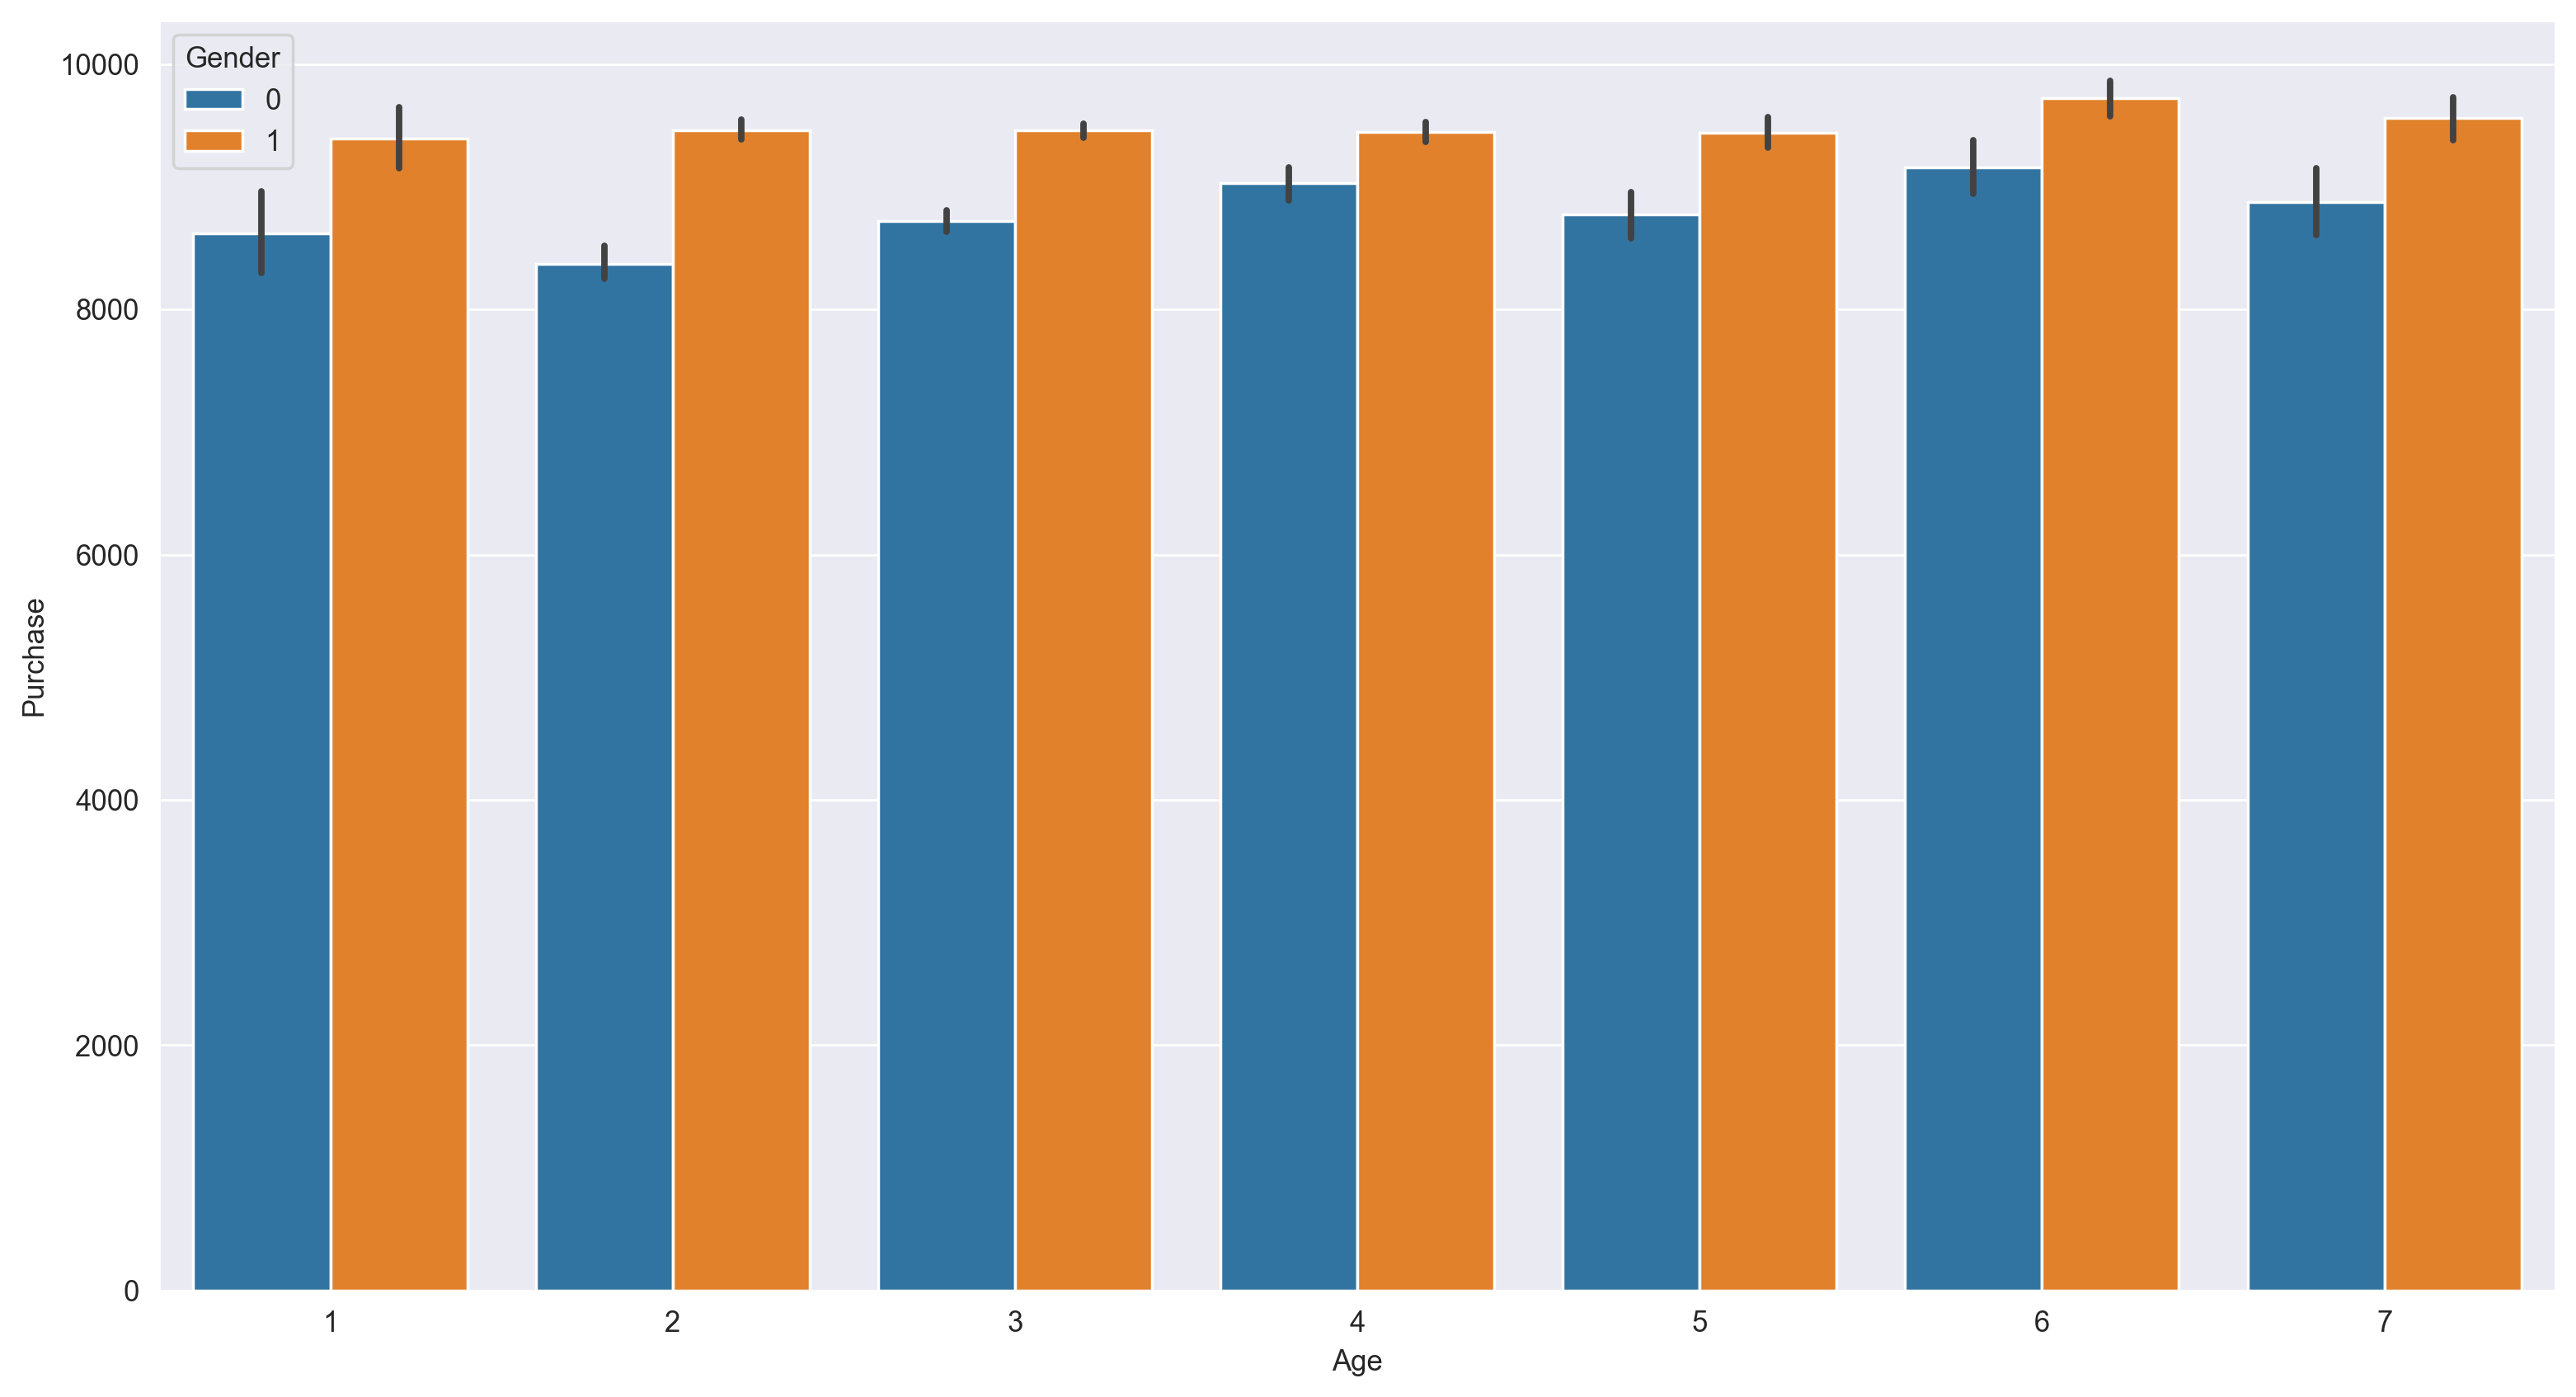

In [26]:
sns.barplot(data=bf, x='Age', y='Purchase',hue='Gender')

#### Purchase with Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

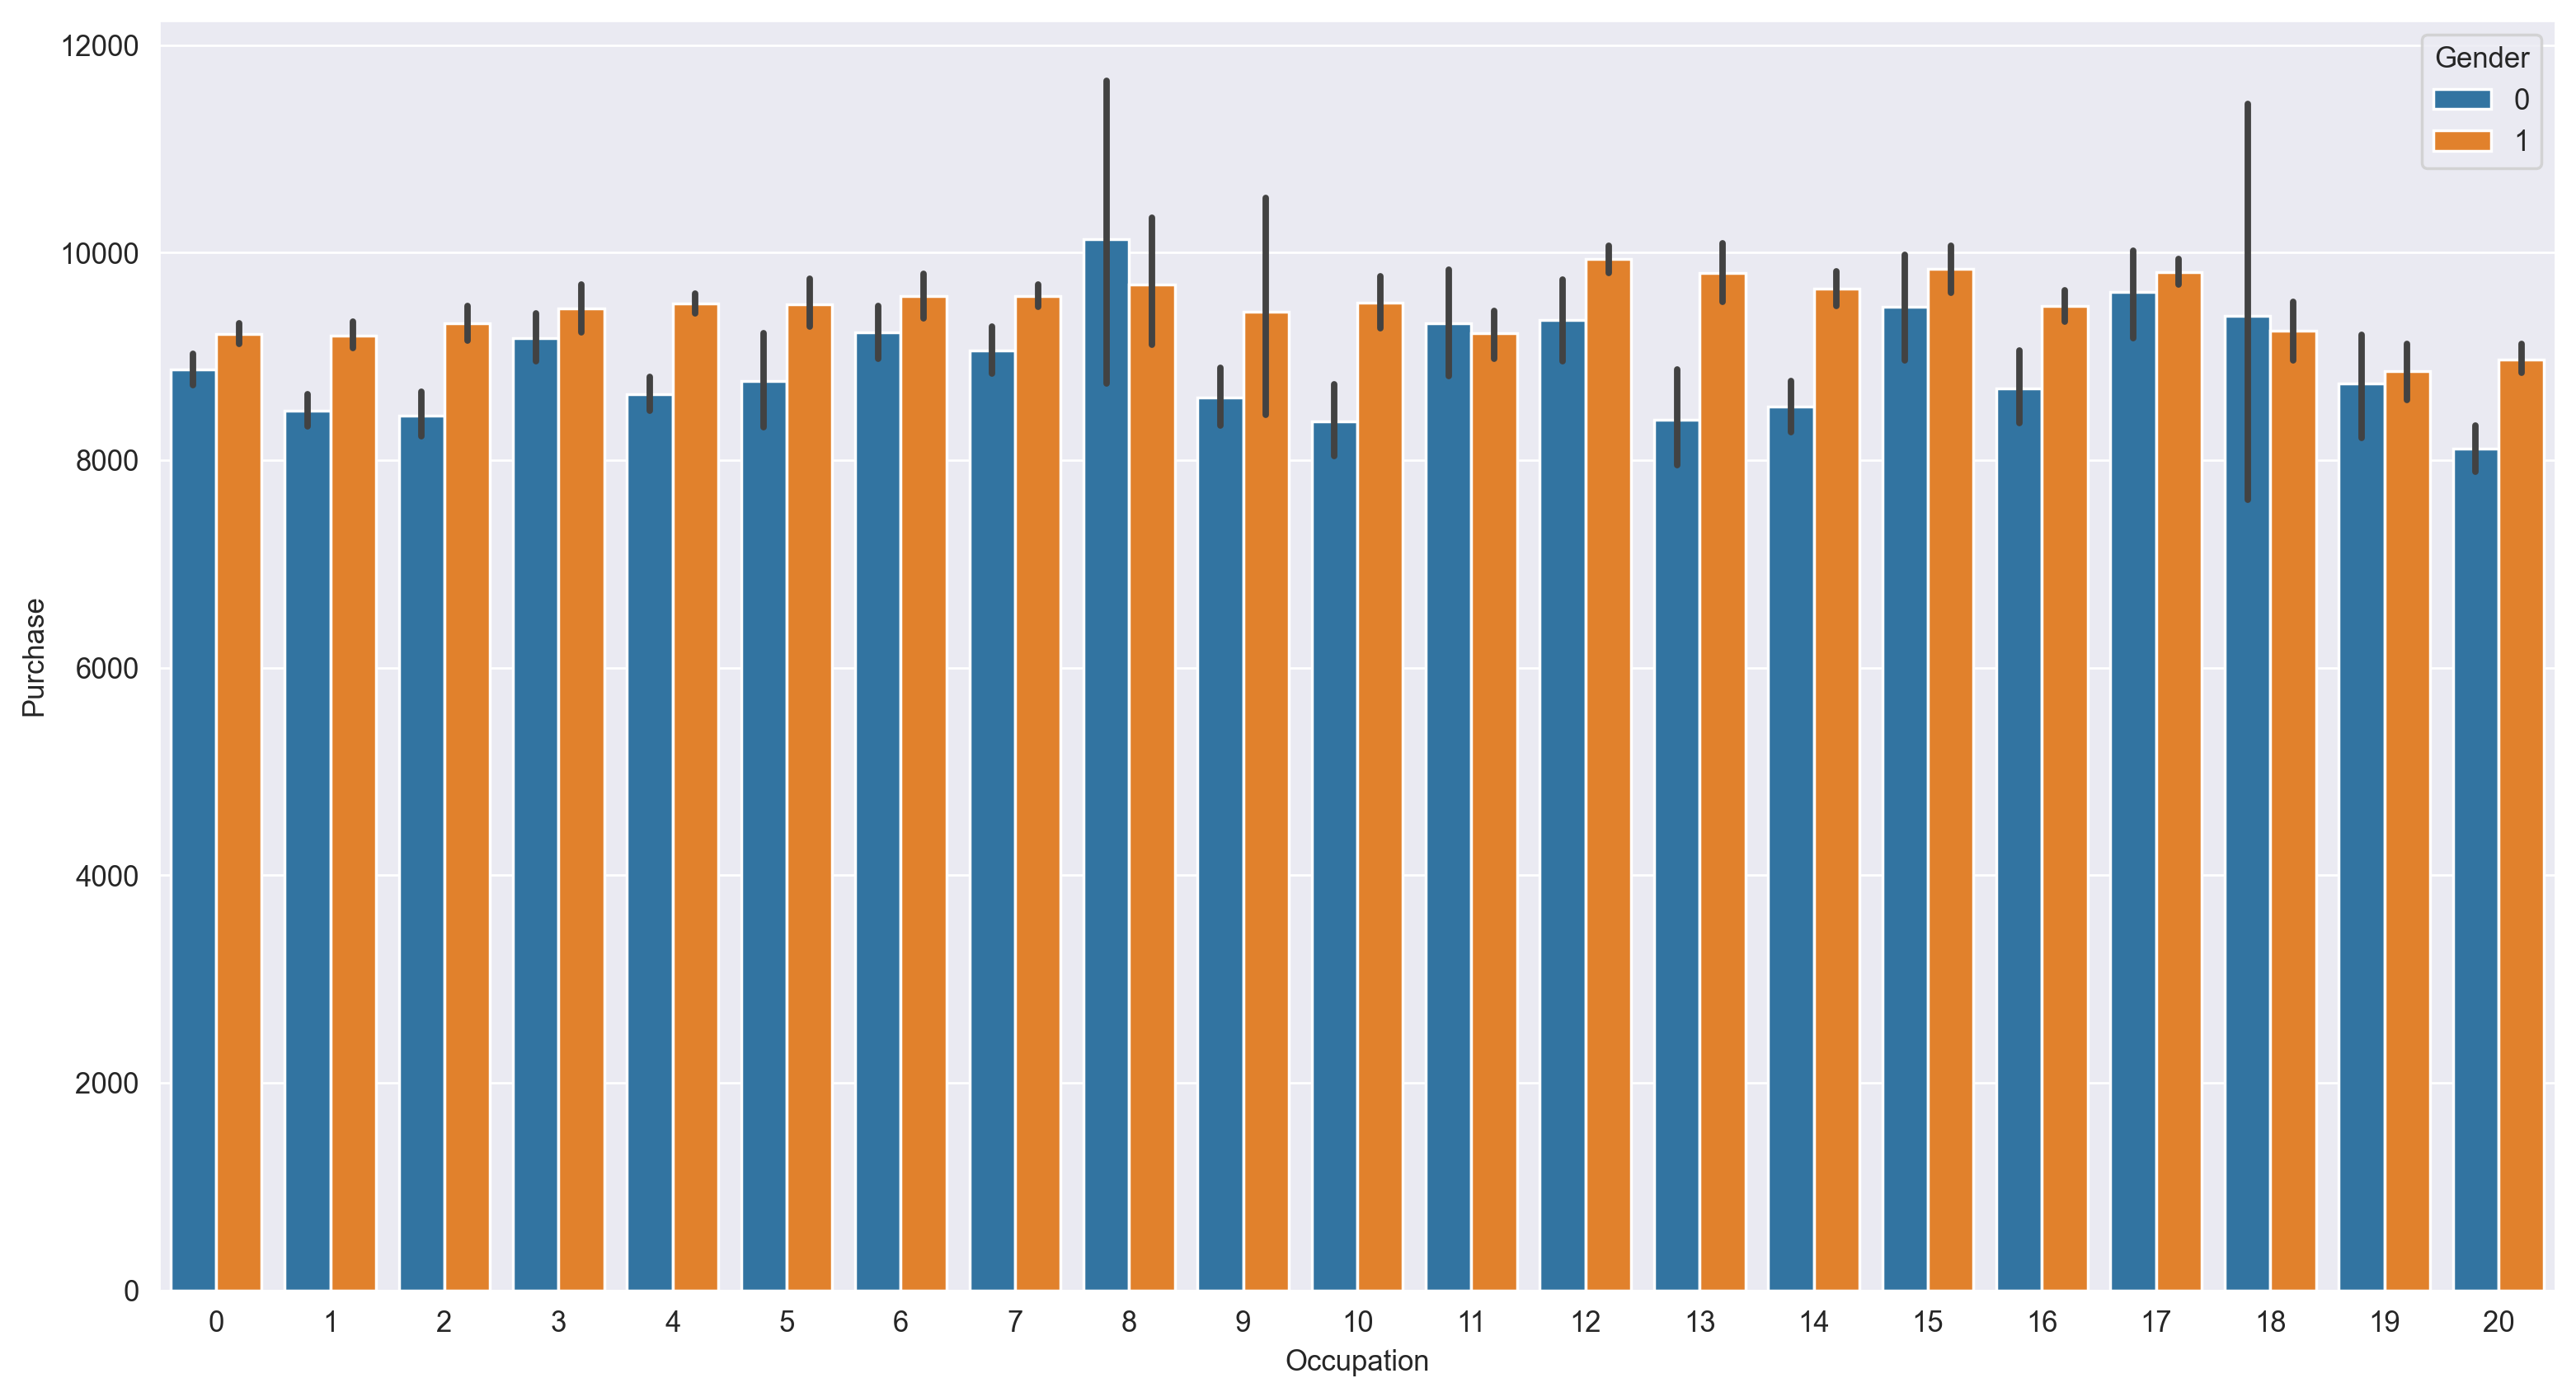

In [27]:
sns.barplot(data=bf, x='Occupation', y='Purchase',hue='Gender')

#### Purchase with Category 1

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

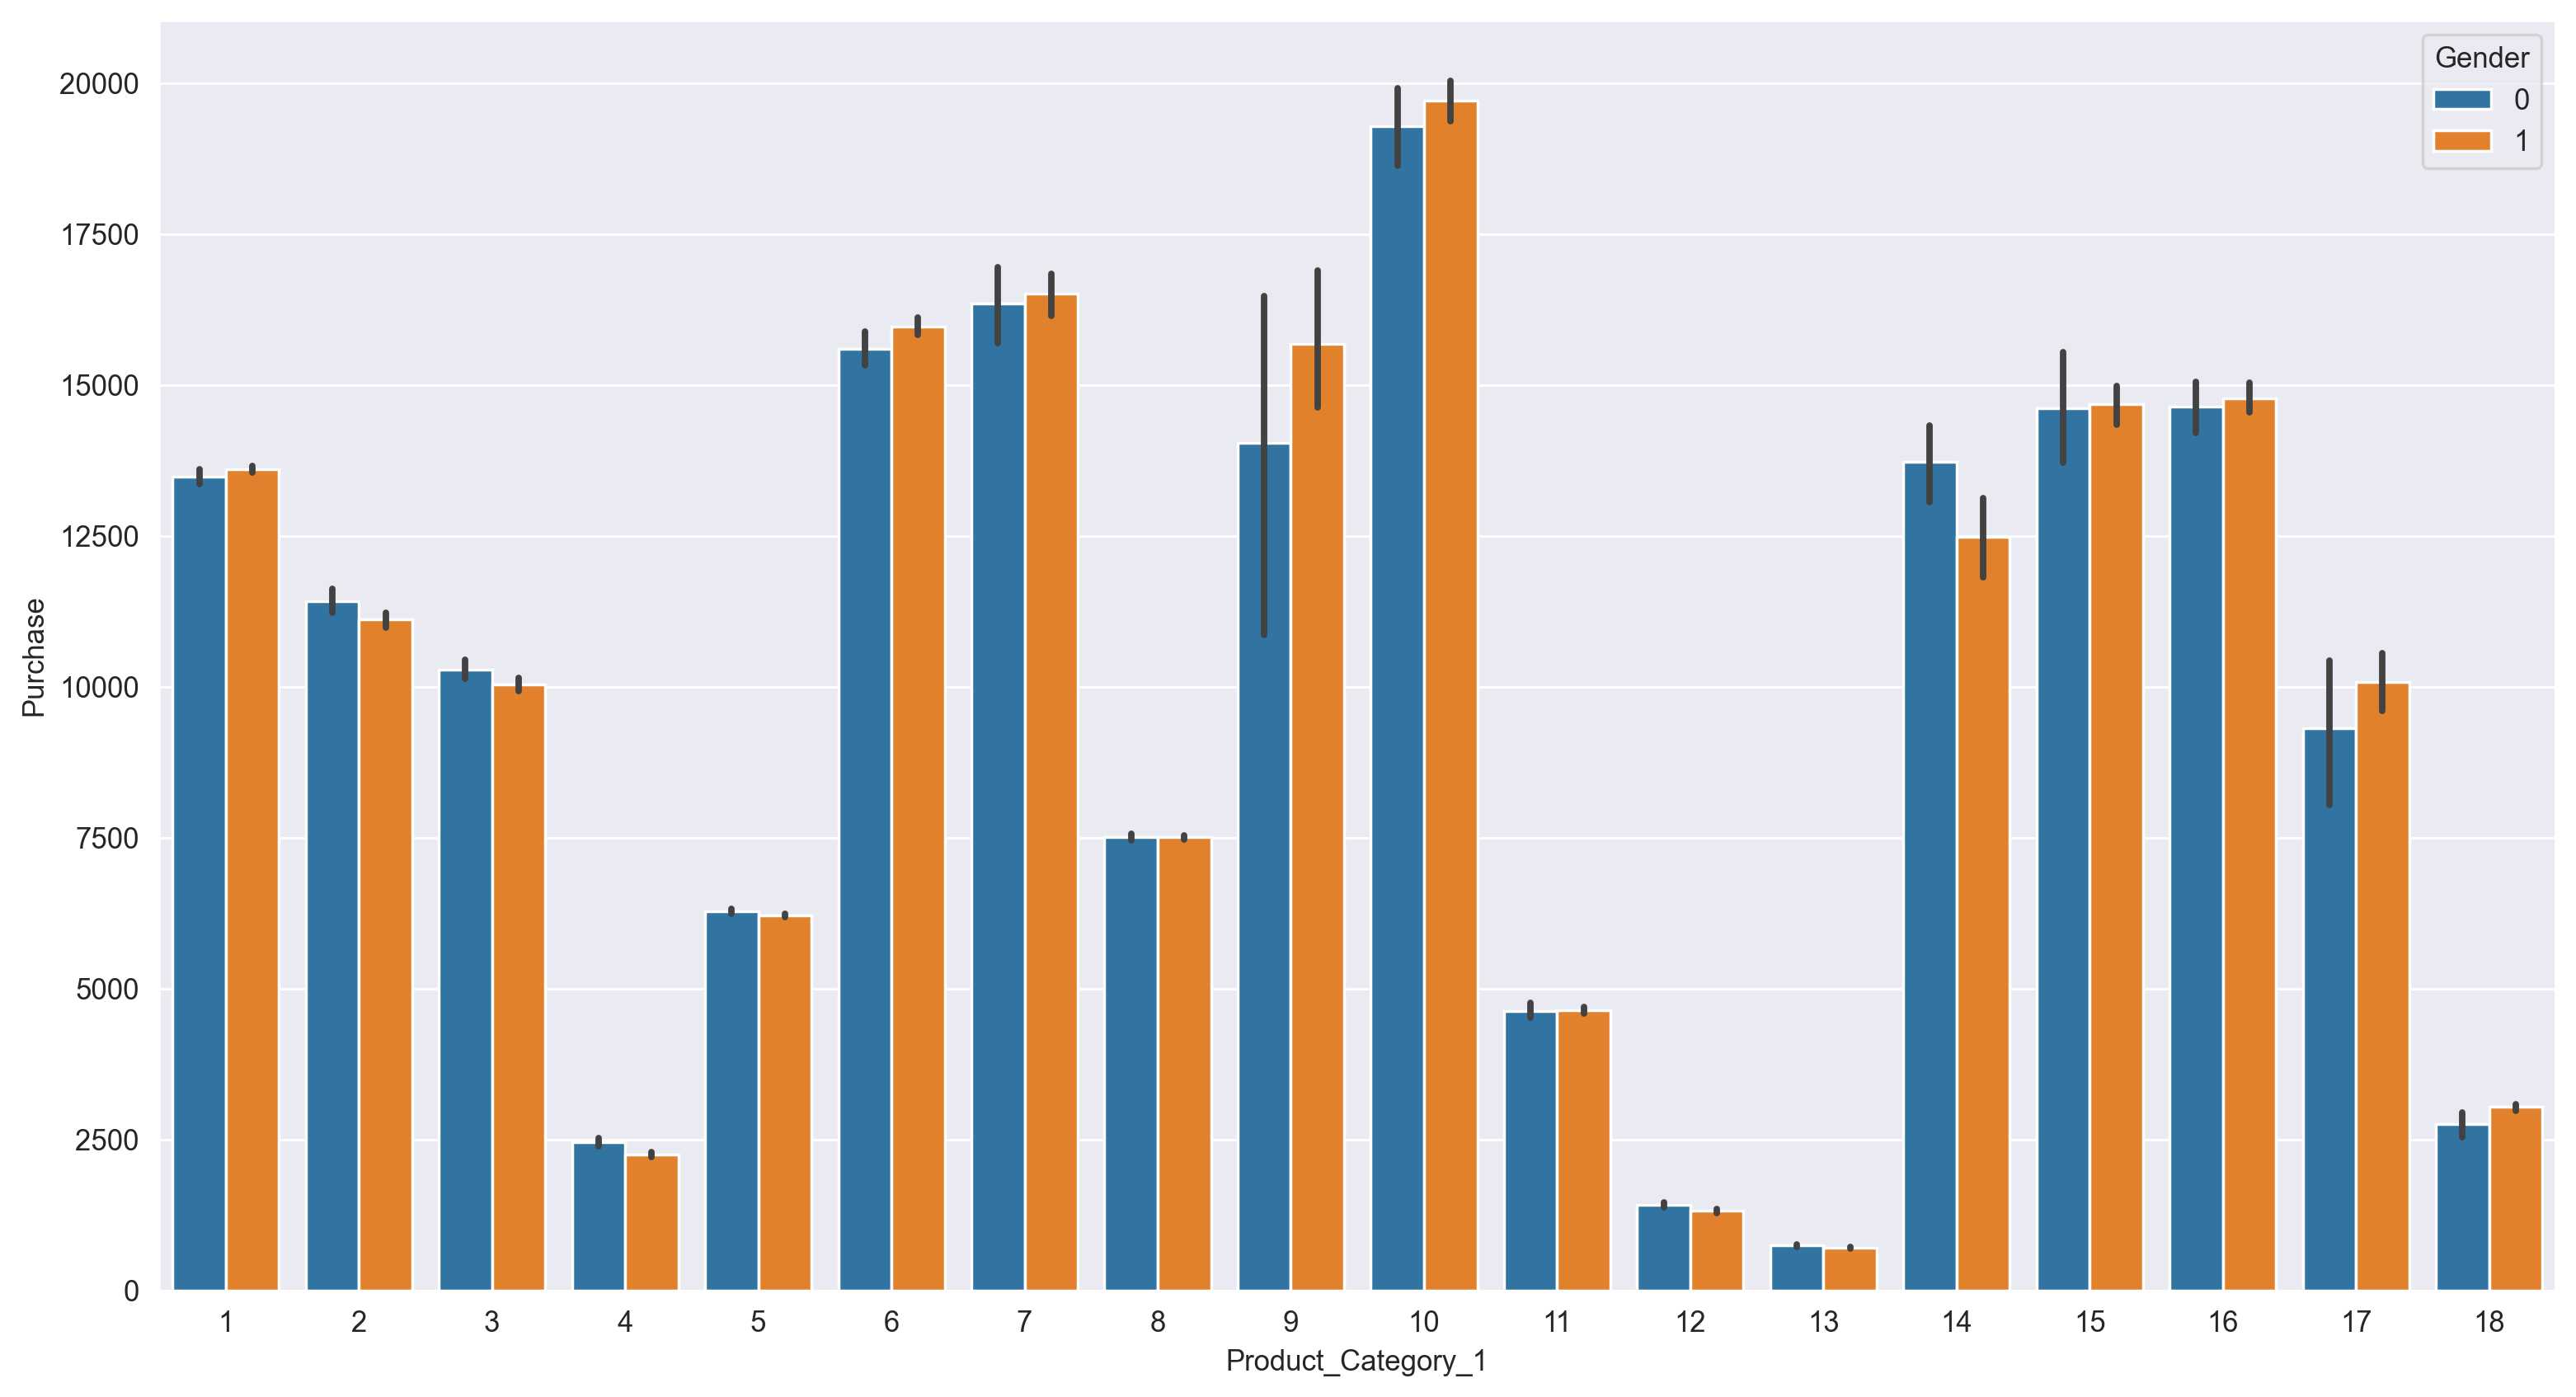

In [28]:
sns.barplot(data=bf, x='Product_Category_1', y='Purchase',hue='Gender')

#### Purchase with Category 2

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

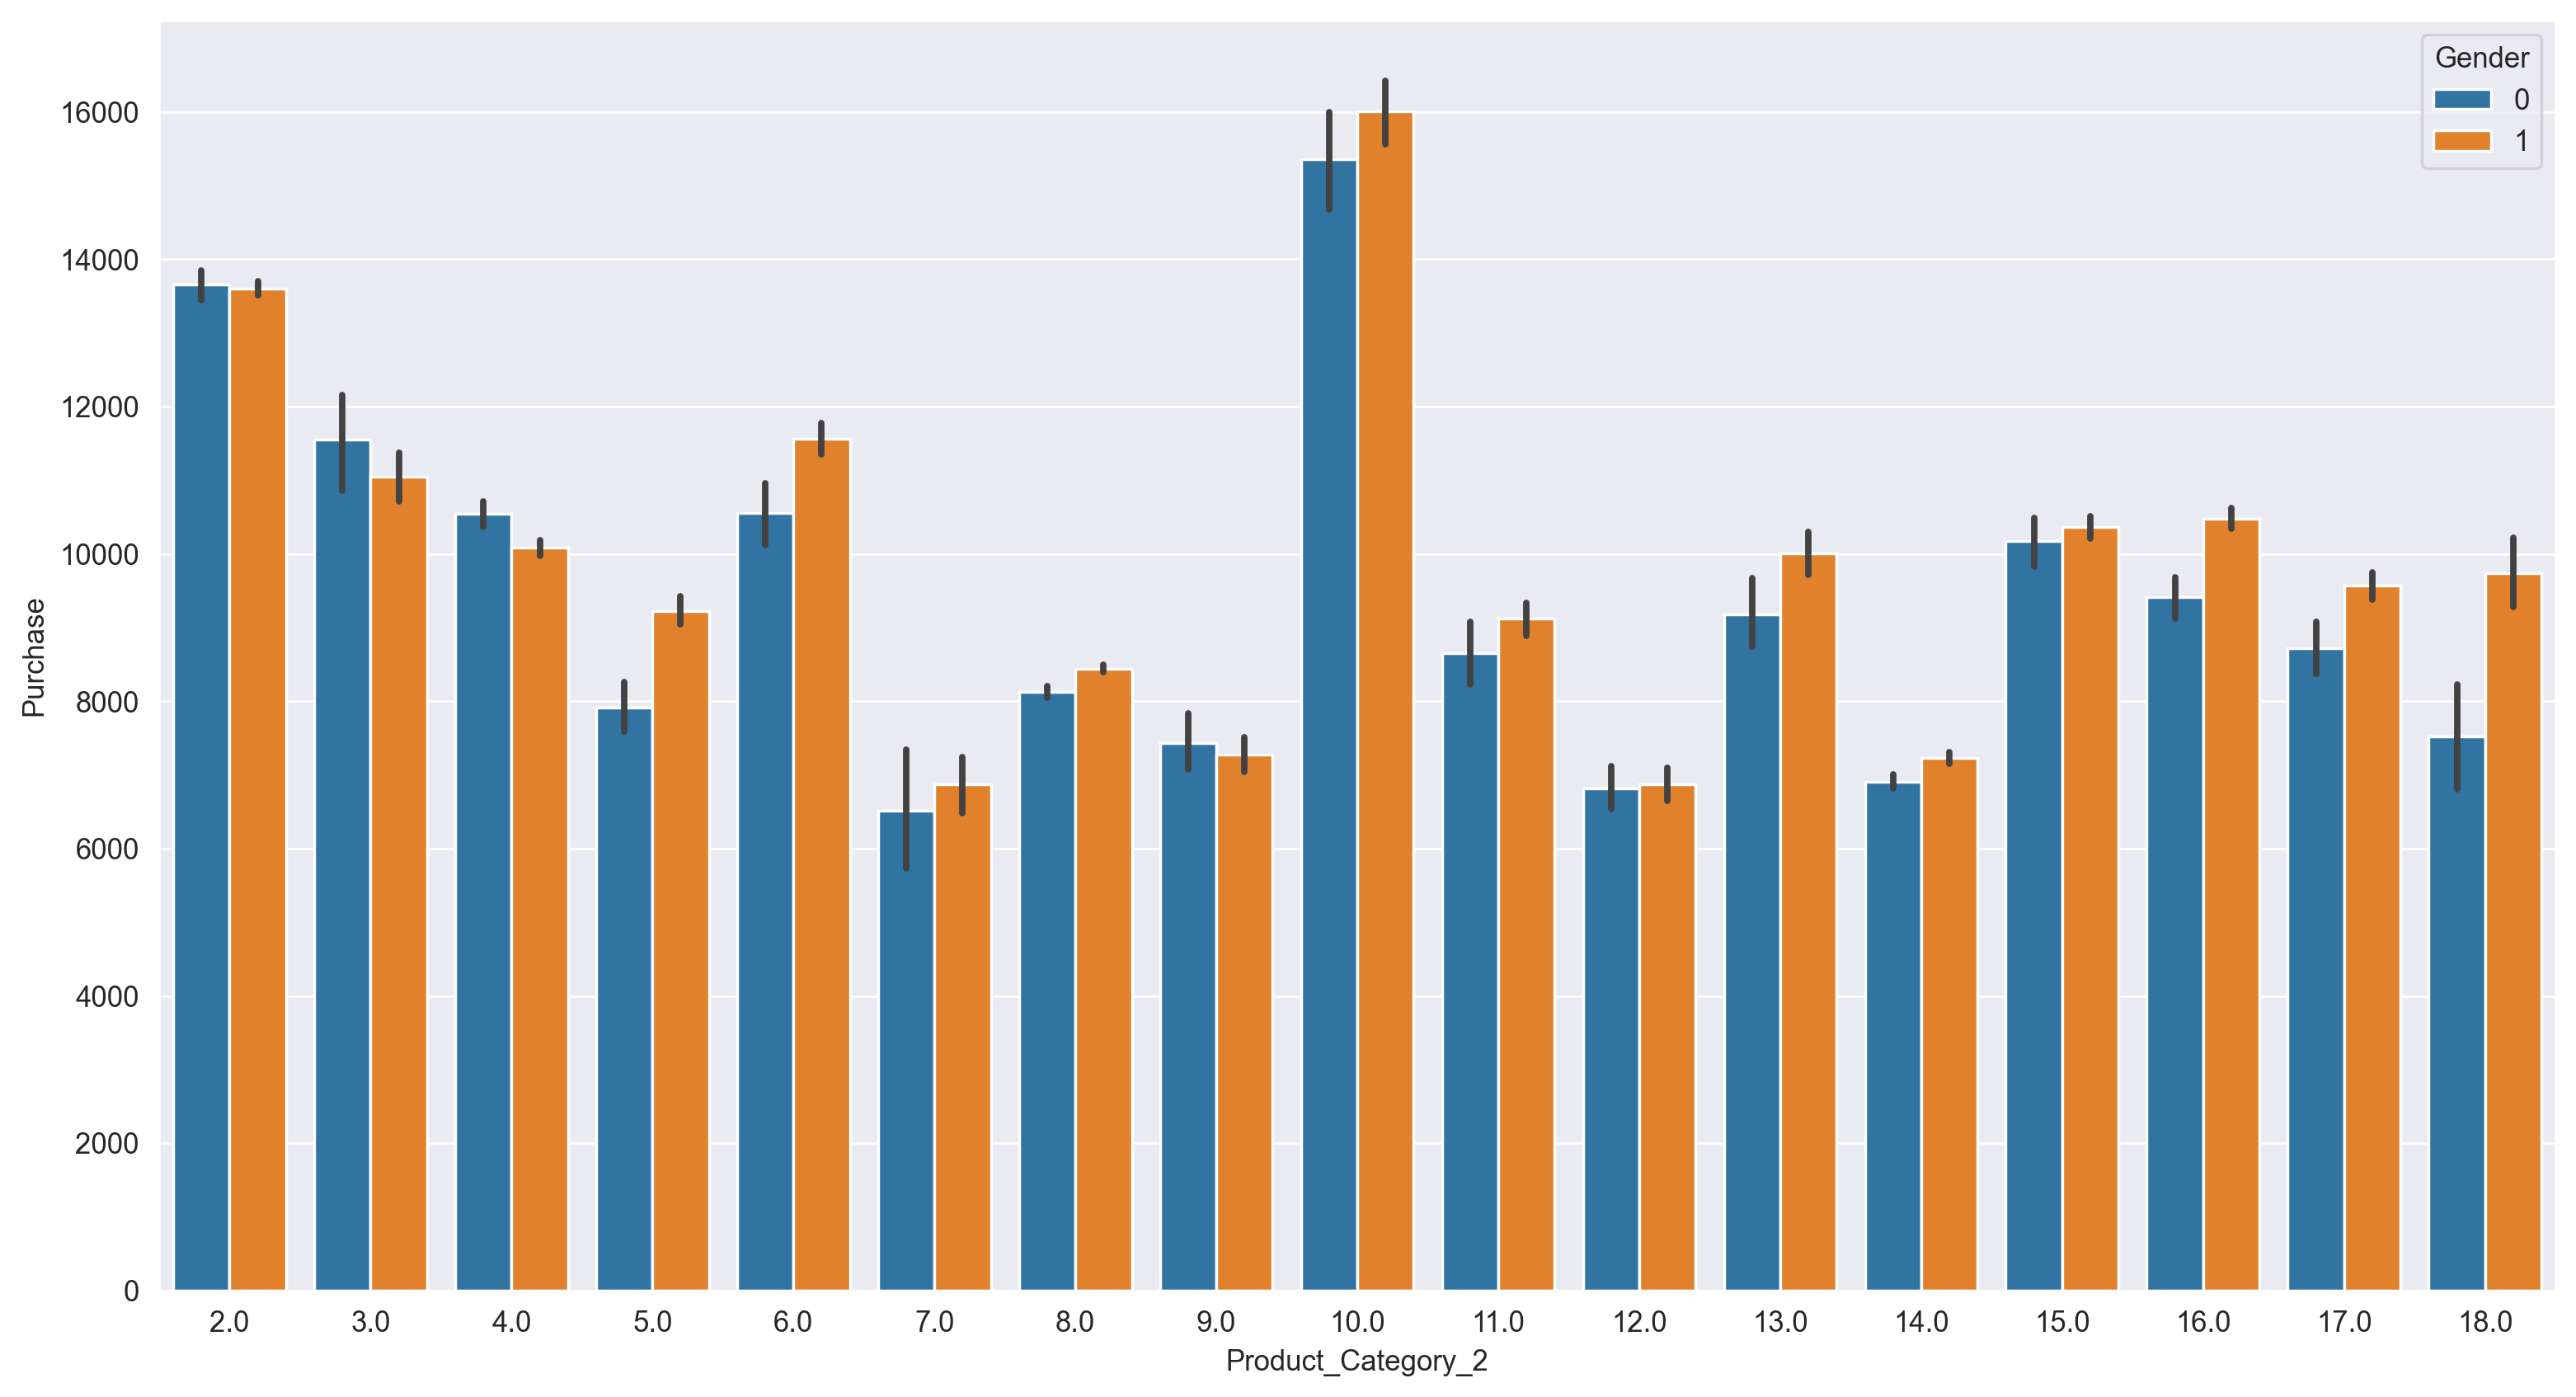

In [29]:
sns.barplot(data=bf, x='Product_Category_2', y='Purchase',hue='Gender')

#### Purchase with Category 3

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

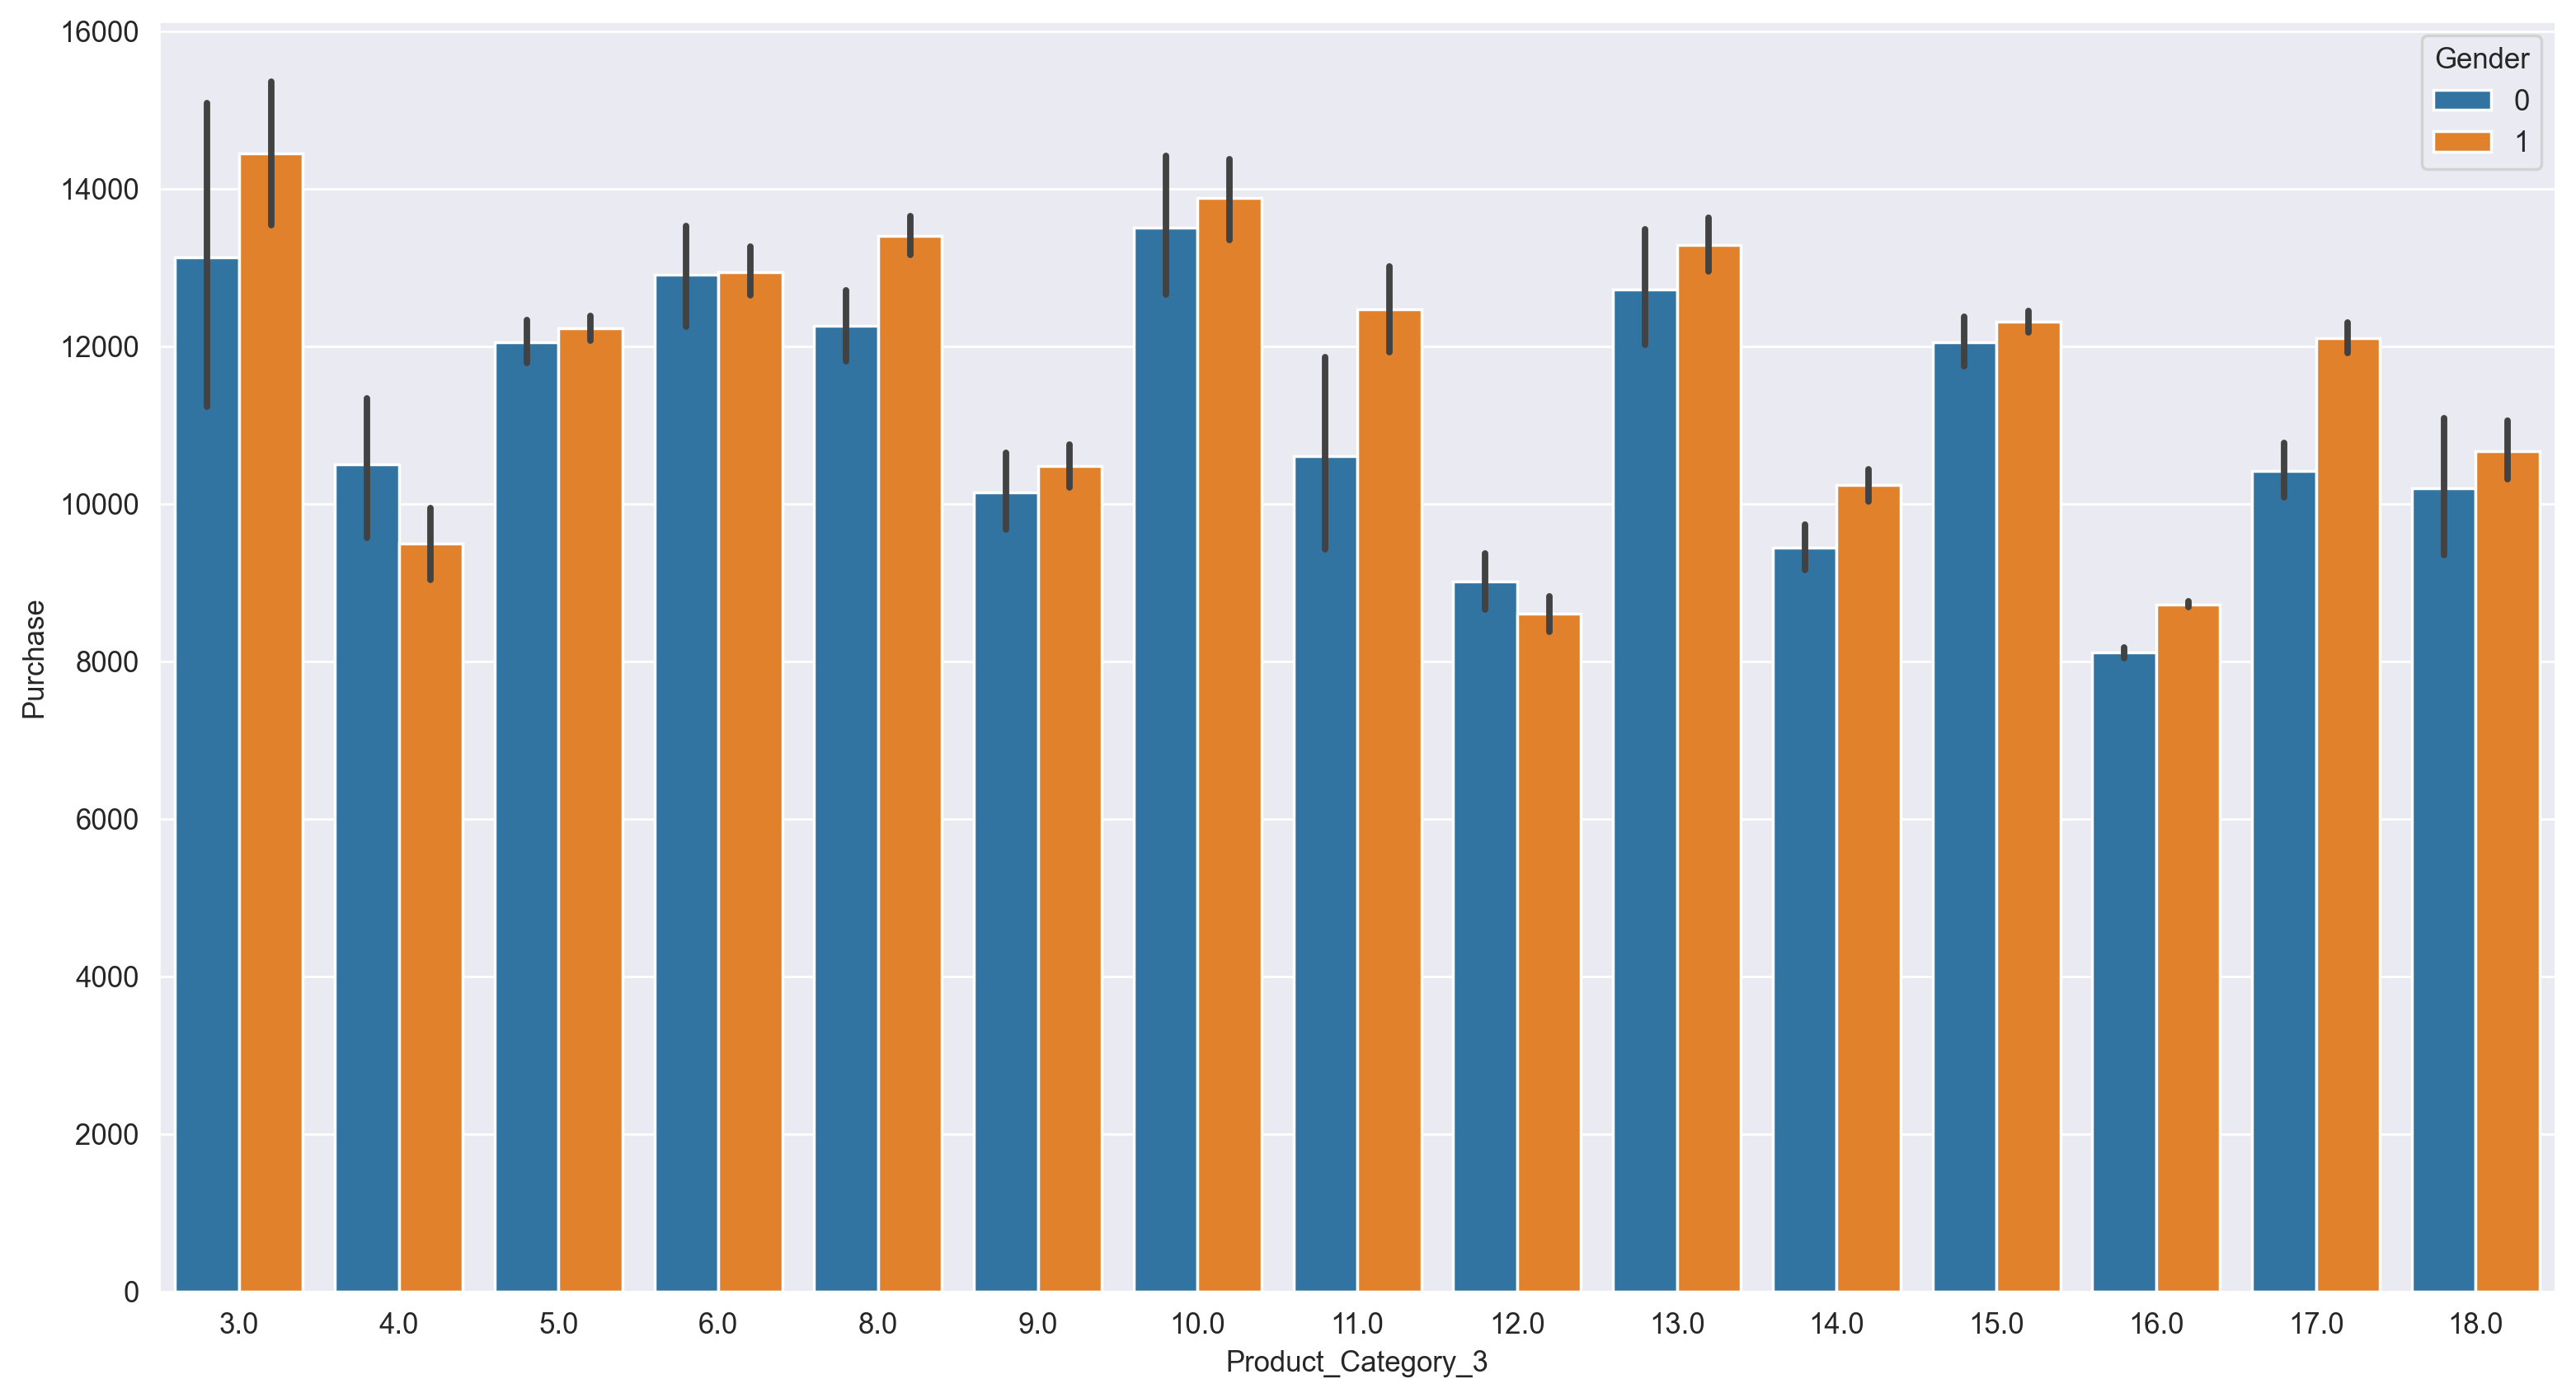

In [30]:
sns.barplot(data=bf, x='Product_Category_3', y='Purchase',hue='Gender')

In [32]:
# bf.to_csv('EDA.csv', index=False)